<h1><font size=6 color=darkred><center> $\fbox{Statistique et apprentissage pour la prévision}$ </center></h1>
<font color=dimgrey size=3><center> $Edna\space Halidath \space RADJI, \space Linda\space DINGUIR\space et \space Rizlène \space BANAT$ </center></h1>

⚠️ Le temps total d'éxécution de ce notebook est assez long : entre 1h30 et 2h ! ⚠️<br>

# Table des matières

## [Importation des librairies](#Imp)

## [1. Analyse Descriptive](#Analyse)
- [1.1. Problématique](#Problématique)
- [1.2. Présentation des données](#PrezDonnees)
    - [1.2.1. Le jeu de données principal](#Donnees_Principal)
    - [1.2.2. Le jeu de données intermédiaires](#Donnees_Intermédiaires)
    - [1.2.3. Jeu de données final](#Donnees_Finale)
- [1.3. Visualisation des données](#VizDonnees)
    - [1.3.1. Affluence vs Covid](#Metro_vs_Covid)
    - [1.3.2. Affluence vs Vacances d'Ete](#Metro_vs_VacsEte)
    - [1.3.3. Affluence vs Typologie du Jour](#Metro_vs_TypeJour)
        
## [2. Construction des modèles](#Construction)
- [2.1. Préparation des données](#PréparationDonnées)
    - [2.1.1. Retraitement des données](#RetraitementDonnees)
    - [2.1.2. Séparation des données d'aprentissage et de test](#Train_Test_Split)
    - [2.1.3. Etape de construction des modèles](#Construction_Modèle)
- [2.2. Un peu de Régression Linéaire : Le modèle Ridge](#Ridge)
    - [2.2.1. Principe](#Principe_Ridge)
    - [2.2.2. Construction du modèle](#Construction_Ridge)
        - [2.2.2.a. Entraînement du modèle Ridge](#Train_Ridge)
        - [2.2.2.b. Prédiction du modèle Ridge](#Test_Ridge)
- [2.3. Un peu de Bagging : Le modèle Random Forest](#RandomForest)
    - [2.3.1. Principe](#Principe_RandomForest)
    - [2.3.2. Construction du modèle](#Construction_RandomForest)
        - [2.3.2.a. Entraînement du modèle RandomForest](#Train_RandomForest)
        - [2.3.2.b. Prédiction du modèle RandomForest](#Test_RandomForest)
- [2.4. Un peu de Boosting : Le modèle XGBoost](#XGBoost)
    - [2.4.1. Principe](#Principe_XGBoost)
    - [2.4.2. Construction du modèle](#Construction_XGBoost)
        - [2.4.2.a. Entraînement du modèle XGBoost](#Train_XGBoost)
        - [2.4.2.b. Prédiction du modèle XGBoost](#Test_XGBoost)
- [2.6. Le modèle LSTM](#LSTM)
    - [2.6.1. Principe](#Principe_LSTM)
    - [2.6.2. Construction du modèle](#Construction_LSTM)
        - [2.6.2.a. Entraînement du modèle LSTM](#Train_LSTM)
        - [2.6.2.b. Prédiction du modèle LSTM](#Test_LSTM)
        
## [3. Combinaison des modèles](#Aggregation)
- [3.1. Principe](#Principe_Comb)
- [3.2. Agrégation Offline](#Agg_Offline)
- [3.3. Agrégation Online](#Agg_Online)
        
## [4. Apprentissage en ligne](#Online)
- [4.1. Principe](#Principe_Online)
- [4.2. Construction du modèle d'Apprentissage en ligne](#Construction_Learning_Online)

## [5. Analyse des résultats](#Comparaison)
- [5.1. Analyse des métriques](#Metriques)
    - [5.1.1. Définitions](#Def_Metriques)
        - [5.1.1.a. Erreur quadratique moyenne (MSE) et Ecart quadratique moyen (RMSE)](#MSE_RMSE)
        - [5.1.1.b. Erreur absolue moyenne (MAE)](#MAE)
    - [5.1.2. Comparaison des métriques](#Comp_Metriques)
- [5.2. Analyse des résidus](#Résidus)
    - [5.2.1. Linéarité des résidus](#Linéarité_Résidus)
    - [5.2.2. Indépendance des résidus](#Indépendance_Résidus)
        - [5.2.2.a. Graphique d'autocorrélation des résidus (ACF)](#ACF)
        - [5.2.2.b. Test de Durbin-Watson](#DW)
    - [5.2.3. Loi des résidus](#Loi_Résidus)
        - [5.2.3.a. Histogramme des résidus standardisés](#Hist_res_std)
        - [5.2.3.b. Diagramme Quantile-Quantile](#QQ-plot)
    - [5.2.4. Homogénéïté des résidus](#Homogénéité_Résidus)
    
## [6. Conclusion](#Conclusion)
- [6.1. Difficultés rencontrées](#Difficultes)
- [6.2. Ouvertures](#Ouvertures)

    
## [Bibliographies](#Bibli)

<h2><font size=6> Importation des librairies<a name="Imp"></a></h2>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import itertools
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import time
from random import random, choice, choices, sample
#plt.style.use("fivethirtyeight")

import pandas as pd
pd.options.display.expand_frame_repr = False
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500
pd.options.display.width = 1000

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor, XGBRFRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from math import sqrt
import seaborn as sns

from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson





2023-01-12 10:22:40.374470: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<h2><font size=6> 1. Analyse Descriptive <a name="Analyse"></a></h2>

<h3><font size=5> 1.1. Problématique <a name="Problématique"></a></h3>

En tant que franciliens, étudiants ou encore salariés, chaque jour nous avons à faire face aux moyens de transport comme le métro, le RER, le tramway ou encore les bus, pour nos divers déplacements quotidiens. Certaines lignes sont plus bondées que d'autres en fonction du moment de la journée où on se trouve créant ainsi un ralentissement du traffic ou des problèmes encore plus graves tels des malaises voyageurs ou des accidents sur les voies ferrées. Ci-dessous un classement exhaustif des métros parisiens en fonction de leurs popularités.

<img src="Classement_Metro.jpg" width="500" height="340">

Le but de chacun étant d'optimiser le temps passé dans les transports en communs, nous avons une idée des lignes les plus bondées en heure de pointe et donc à éviter si nous le pouvons. Cependant, certaines stations sont impossible à éviter en particulier celles qui possèdent plusieurs correspondances. De ce fait, plus la station a de correspondances, plus cette station comptera de validations par jour. Dans ce sens, il peut avoir des jours où le traffic est complètement saturé dans certaines stations. 

<img src="Metro_Bonde.jpg" width="500" height="340">

Par exemple, pendant les jours de greve du RER A (fréquenté par plus d'un million de voyageurs par jour), les usagers se ruent sur des lignes alternatives. A Saint-Lazare ils se rabattent sur les lignes de metro 3, 12 et 13.

Etant nous même étudiantes en région parisienne et concernées par ce problème, nous avons voulu prédire le nombre de validation par jour et par station de métro sur la ligne 1 en Ile-de-France. Nous avons choisit cette ligne car elle constitue une voie de communication est-ouest majeur pour la ville puisque c'est historiquement la ligne de métro la plus fréquentée du réseau et la première à être automatisée. 

Nous pensons que ce type de prédiction peut être très bénéfique à tous les usagers des transports en communs parisiens. En effet, à partir de ces prédictions (sous la condition qu'elles soient fiables), nous pouvons savoir à l'avance combien de métros prévoir pour la journée ou encore combien de travailleurs ce jour-là pour controler le flux et éviter des accidents passagers. Ce qui pourrait également permettre de réguler le traffic sur les autres lignes car nous savons qu'elles sont liées.

Pour répondre à cette problématique, on s'est chargée de récolter des données sur le nombre de validation des voies ferées sur le site de la sncf, de la ratp ou encore sur open.data.paris.

<h3><font size=5> 1.2. Présentation des données <a name="PrezDonnees"></a></h3>

Pour notre projet du cours Statistique et Apprentissage pour la prévision, nous avons décidé d'utiliser deux jeux de données, un jeu de données principal et un jeu de données intermédiaires, que nous avons joint par la suite.

<h4><font size=4> 1.2.1. Le jeu de données principal <a name="Donnees_Principal"></a></h4>

Le jeu de données principal retranscrit le nombre de validations des voyageurs par jour, par arrêt et par titre de transport sur le réseau ferré en Ile-de-France de 2015 jusqu'à aujourd'hui. Nous avons trouvé ce jeu de données sur le site de la sncf sous deux liens différents : 
- https://datasncf.opendatasoft.com/explore/dataset/validations-reseau-ferre-nombre-validations-par-jour-1er-semestre/information/ (les données du 1er Janvier 2022 au 30 Juin 2022)
- https://prim.iledefrance-mobilites.fr/fr/donnees-statiques/histo-validations-reseau-ferre (les données du 1er Janvier 2015 au 31 Décembre 2021)

Dans ce jeu de données, seuls la date du jour, la station et le nombre de validation nous importe. Nous avons donc choisi de ne garder que ces trois variables.

**Comment ces données sont-elles obtenues ?**

Depuis plusieurs années, Ile-de-France Mobilités a décidé de généraliser le passage des tickets magnétiques sur support télébilléttique avec le Pass Navigo.
Dans ce cadre, il a conçu un système d’information décisionnel lui permettant une meilleure connaissance de la mobilité des usagers.

Ce système permet la remontée des données de validation depuis les opérateurs jusqu’à Ile-de-France Mobilités, puis leur uniformisation et leur archivage.
Dès lors, à chaque fois qu’un usager valide son passe Navigo sur le réseau francilien, une information anonyme est remontée à un système central permettant la collecte et le calcul de statistiques sur la
mobilité.

On note par exemple 11 millions de validations remontées par jour ouvrable, 5 millions un samedi et 3 millions un dimanche. En tout, près de 2,7 milliards de validations par an.
    

<h4><font size=4> 1.2.2. Le jeu de données intermédiaries <a name="Donnees_Intermédiaires"></a></h4>

L'affluence d'une ligne dépend énormément de la journée et de la période de l'année. Une journée de grêve, un dimanche encore le 25 décembre ne comptabilisera pas le même nombre de validations qu'une journée lambda. C'est pourquoi nous avons choisi d'inclure un jeu de données évenementiel décrivant les grêves, les périodes de vacances, les jours fériés et les fêtes importantes.

Notre problématique étant de prédire le nombre de validation par jour et par arrêt, nous avons trouvés pertinent de déterminer les jours de grêves, les périodes de vacances, les jours de fêtes et différentes autres évenements que nous avons jugés important de rajouter comme les périodes de confinement et de couvres-feu dûes au Covid.

Définissons les étapes que nous avons faîtes :

- Pour cela, nous avons répertorié toutes les grèves qui se sont déroulées du 1er Janvier 2015 au 31 Décembre 2021 en lien avec les transports et que nous avons trouvés sur le site [https://www.cestlagreve.fr/] sous trois modalités :
    - Aucune, si aucune grève n'a eu lieu ce jour-là
    - Forte, s'il s'agit d'une grève pouvant impacter le traffic sur la ligne 1 (grève des RER, grève à Châtelet-les-halles, grèves nationales...) 
    - Faible sinon (grève des travailleurs...)
    
- Ensuite, nous avons également relevé tous les jours fériés, jours de fêtes et périodes de vacances scolaires de ces sept années sur les sites [https://www.jour-ferie.info/dates-des-fetes-et-jours-feries-en-2022/ ; https://vacances-scolaires.education/annee-2021-2022.php]. Nous avons choisi de garder les noms des jours fériés, jours de fêtes et périodes de vacances pour que nos modèle de prédiciton les distinguent

- Enfin, nous avons rajouté à nos données les périodes de confinement et de couvre-feu pendant les années Covid que nous avons récupéré sur le site Wikipédia [https://fr.wikipedia.org/wiki/Confinements_li%C3%A9s_%C3%A0_la_pand%C3%A9mie_de_Covid-19_en_France#:~:text=du%2017%20mars%20au%2011,non%20inclus%2C%20soit%2028%20jours. ; https://www.vie-publique.fr/en-bref/277391-covid-19-couvre-feu-18-heures-partir-du-16-janvier]

Après avoir éffectué toutes ces analyses et codifications, nous obtenons enfin notre base de données finale et notre étude statistique peut commencer.

<h4><font size=4> 1.2.3. Jeu de données final <a name="Donnees_Finale"></a></h4>

Maintenant que nous avons décrits nos différents jeux de données, joignons les !
*(La jointure des données a été faite en amont. Voir le notebook "Préparation des données" pour plus de précision sur la procédure.)*

Après avoir joint nos jeux de données, nous avons également rajouter des variables qui récupère le mois, le jour de la semaine, le jour de l'année ainsi que l'année du jour en indice. 

In [2]:
# Base de données jointe
data = pd.read_csv("Bases/Base_NBVALD.csv", index_col="date", parse_dates=True)

Voici ce que nous obtenons comme base finale :

In [3]:
data.head(2)

,ferie,fete,greve,vacance,confinement,couvre_feu,nb_validation,num_jour,type_jour,num_mois,type_mois,annee
date,,,,,,,,,,,,
2015-01-01,Jour de l’an,Aucun,Aucun,Noël,Aucun,Aucun,124179,3,Jeudi,1,Janvier,2015
2015-01-02,Aucun,Aucun,Faible,Noël,Aucun,Aucun,383734,4,Vendredi,1,Janvier,2015


Nous avons donc 11 variables à notre disposition pour construire nos modèles :
- nb_validation : 
- greve : 
- ferie : qui représente 
- fetes : 
- vacances : 
- confinement :
- couvre_feu : 
- num_mois :
- annee : 
- type_jour : 
- num_jour : 

Notre jeu de données ne possèdent aucunes données manquantes ce qui nous permet d'avoir un jeu de données assez riche.

<font color=red> Plus de description

<h3><font size=5> 1.3. Visualisation des données <a name="VizDonnees"></a></h3>

Nous allons maintenant faire un peu de visualisation sur la base de données jointe pour déceler de potentiels pattern.

Pour cela, nous allons nous concentrer sur les évenements : comment les périodes de vacances, les périodes de confinement affectent l'affluence des métros etc...

Commençons par le Covid !

<h4><font size=4> 1.3.1. Affluence vs Covid <a name="Metro_vs_Covid"></a></h4>

Remettons l'évolution de nombre de validation au cours du temps.

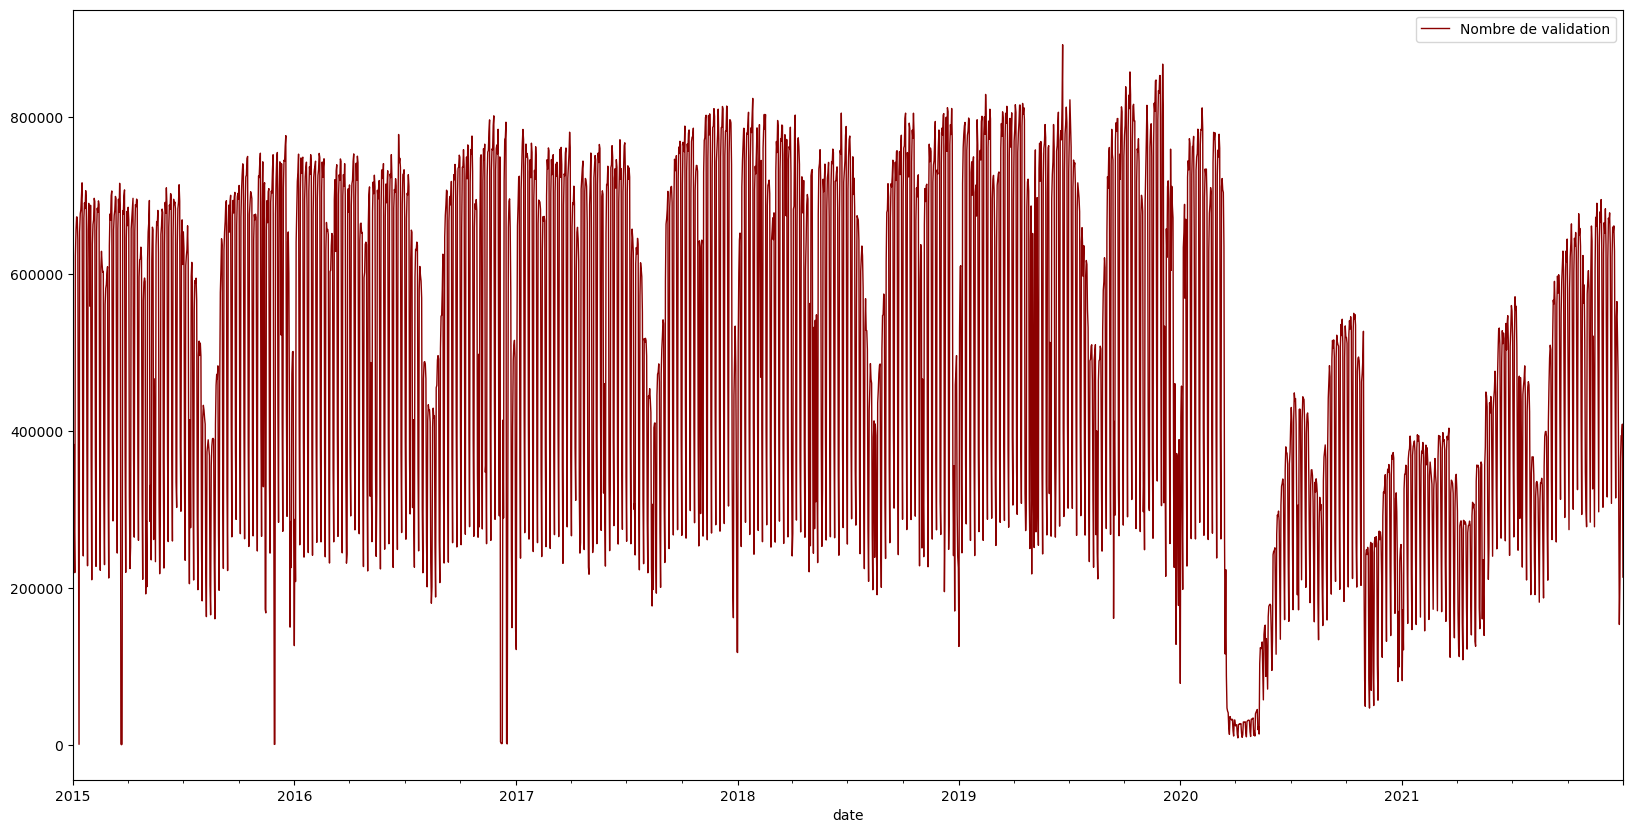

In [4]:
plt.figure(figsize=(20,10))
data["nb_validation"].plot(label="Nombre de validation", c="darkred", lw=1)
plt.legend()
plt.savefig('Affluence au cours du temps.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Nous pouvons relevé des informations très importantes que nous avons survolé précedemment. Par exemple, nous voyons qu'en 2020, le nombre de validations a drastiquement chuté. L'année 2020 étant l'année du Covid, du début des confinements et des couvres-feu, nous allons regarder ce qu'il se passe de plus prés. 

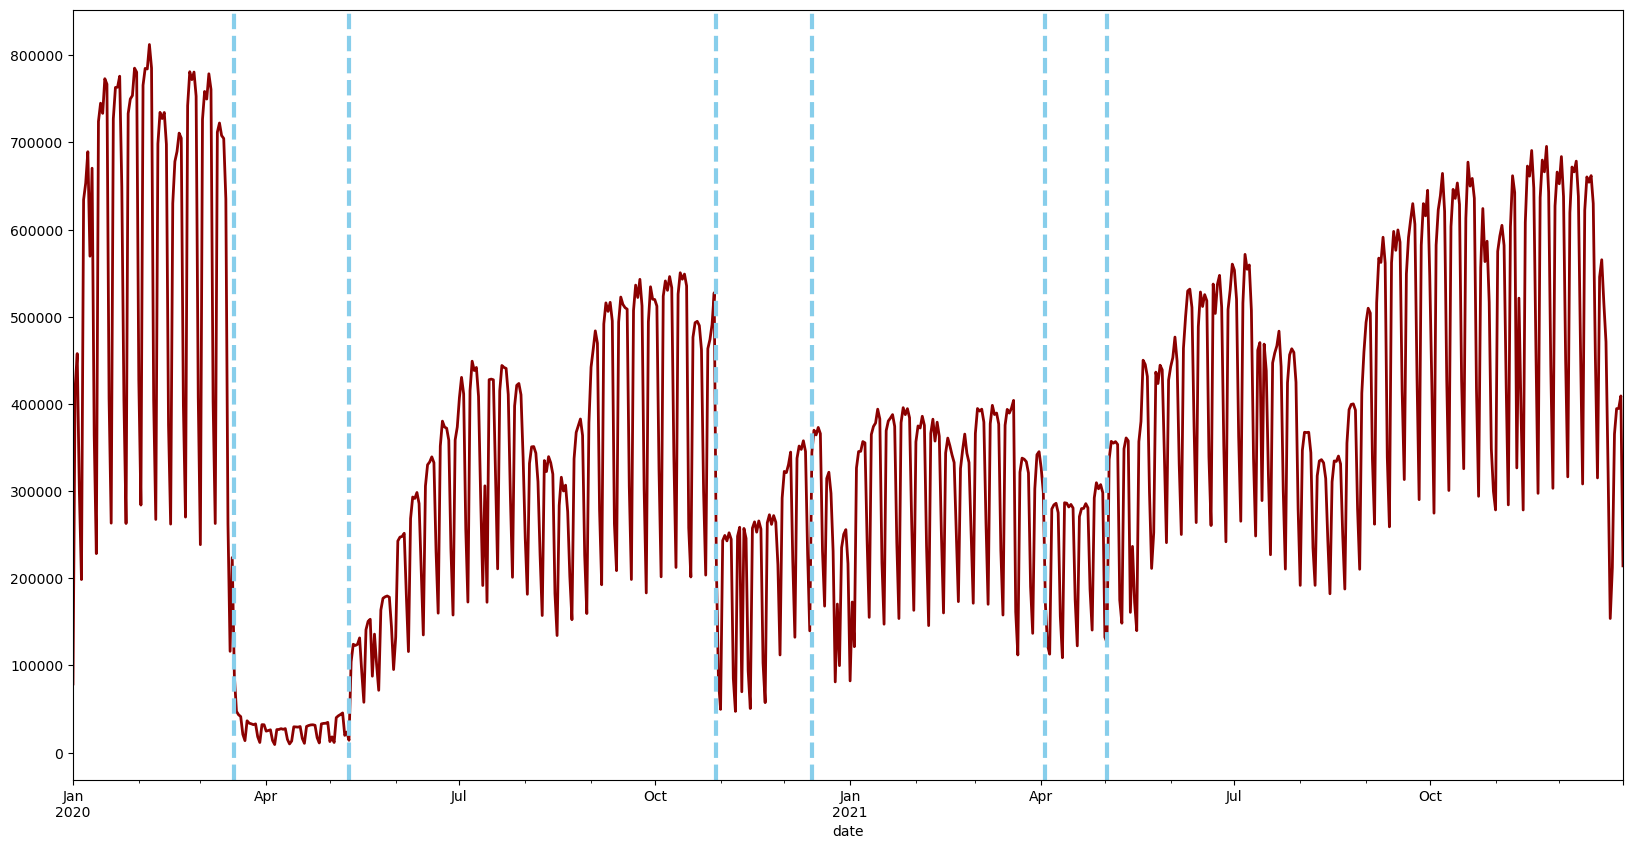

In [5]:
plt.figure(figsize=(20,10))

data.loc["2020":"2021","nb_validation"].plot(c="darkred", lw=2)

# Confinement
plt.axvline(x="2020-03-17", color="skyblue", lw=3, ls="--")
plt.axvline(x="2020-05-10", color="skyblue", lw=3, ls="--")

plt.axvline(x="2020-10-30", color="skyblue", lw=3, ls="--")
plt.axvline(x="2020-12-14", color="skyblue", lw=3, ls="--")

plt.axvline(x="2021-04-03", color="skyblue", lw=3, ls="--")
plt.axvline(x="2021-05-02", color="skyblue", lw=3, ls="--")

#plt.legend()
plt.savefig('Affluence vs Confinement.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Cette fois-ci, nous avons représenter nos données du 1er Janvier 2020 au 31 Septembre 2021. Toutes les périodes de confinements, de couvres-feu et de restriction sanitaires étant comprises entre ces deux dates.

Nous remarquons alors qu'à chaque confinement, une baisse du nombre de validatieu a lieu, ce qui est tout à fait logique. D'ailleurs la baisse est plus drastique lors du Premier Confinement tout simplement parce que ce confinement fût le plus strict. 

Ces périodes correspondent à des évenements exceptionnels, elles devront donc nécéssairement être traitées si on ne veut pas fausser notre prédiction. 

<h4><font size=4> 1.3.2. Affluence vs Vacances d'Ete <a name="Metro_vs_VacsEte"></a></h4>

Revenons à notre graphique de départ.

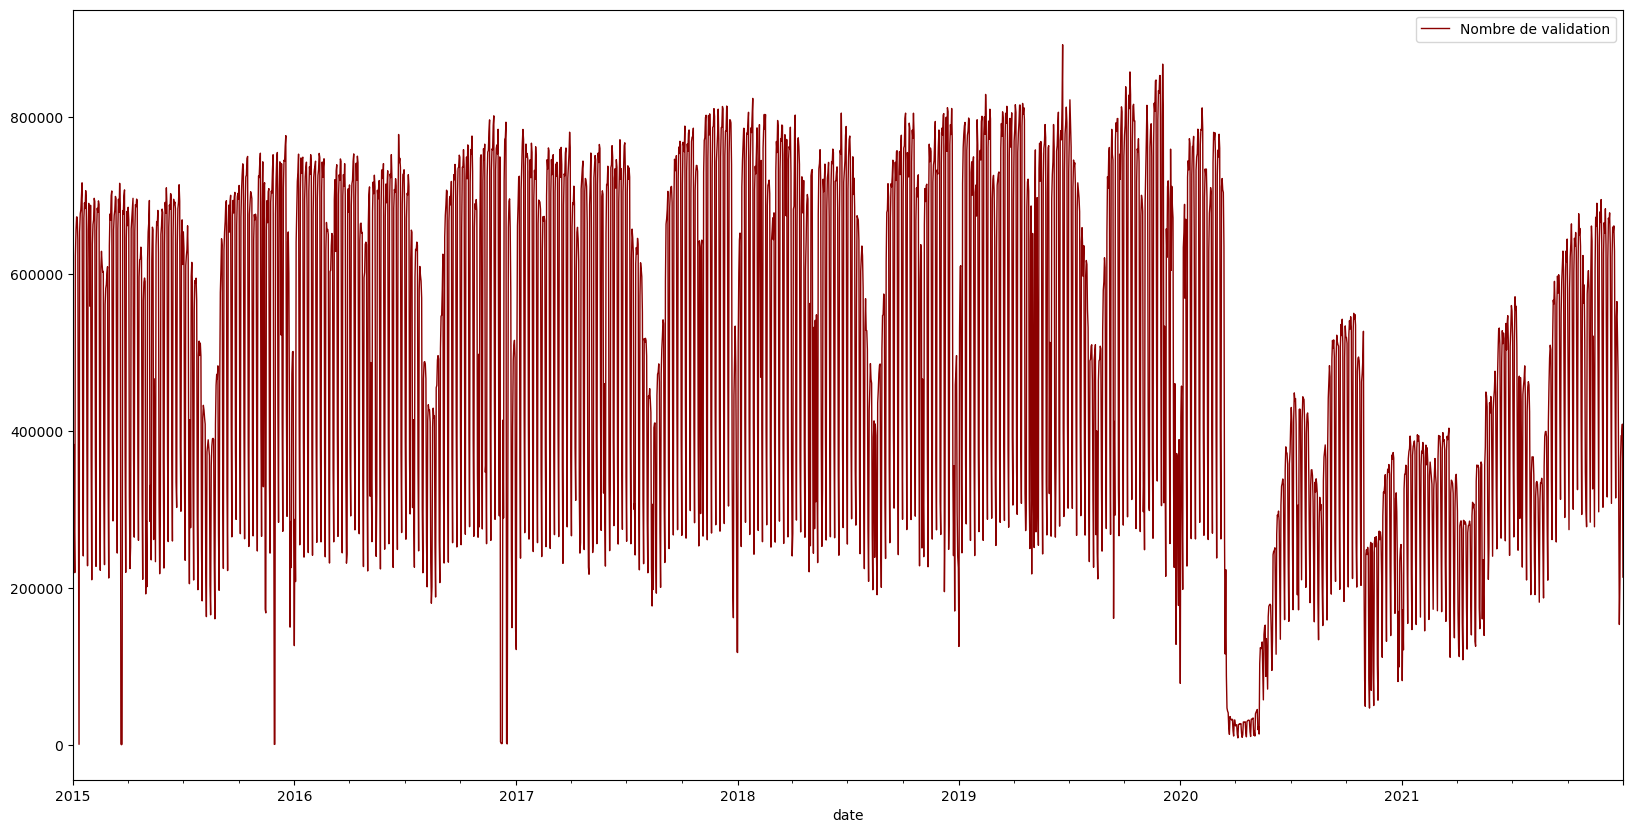

In [6]:
plt.figure(figsize=(20,10))
data["nb_validation"].plot(label="Nombre de validation", c="darkred", lw=1)
plt.legend()
plt.show()

Un autre détail est censé attiré notre attention. En effet, on remarque qu'à chaque deuxième moitié d'année, il y a une période où le nombre de validation baisse significativement. Regardons cela de plus prés en se concentrant cette fois sur le nombre de validation par mois et non par jour. 

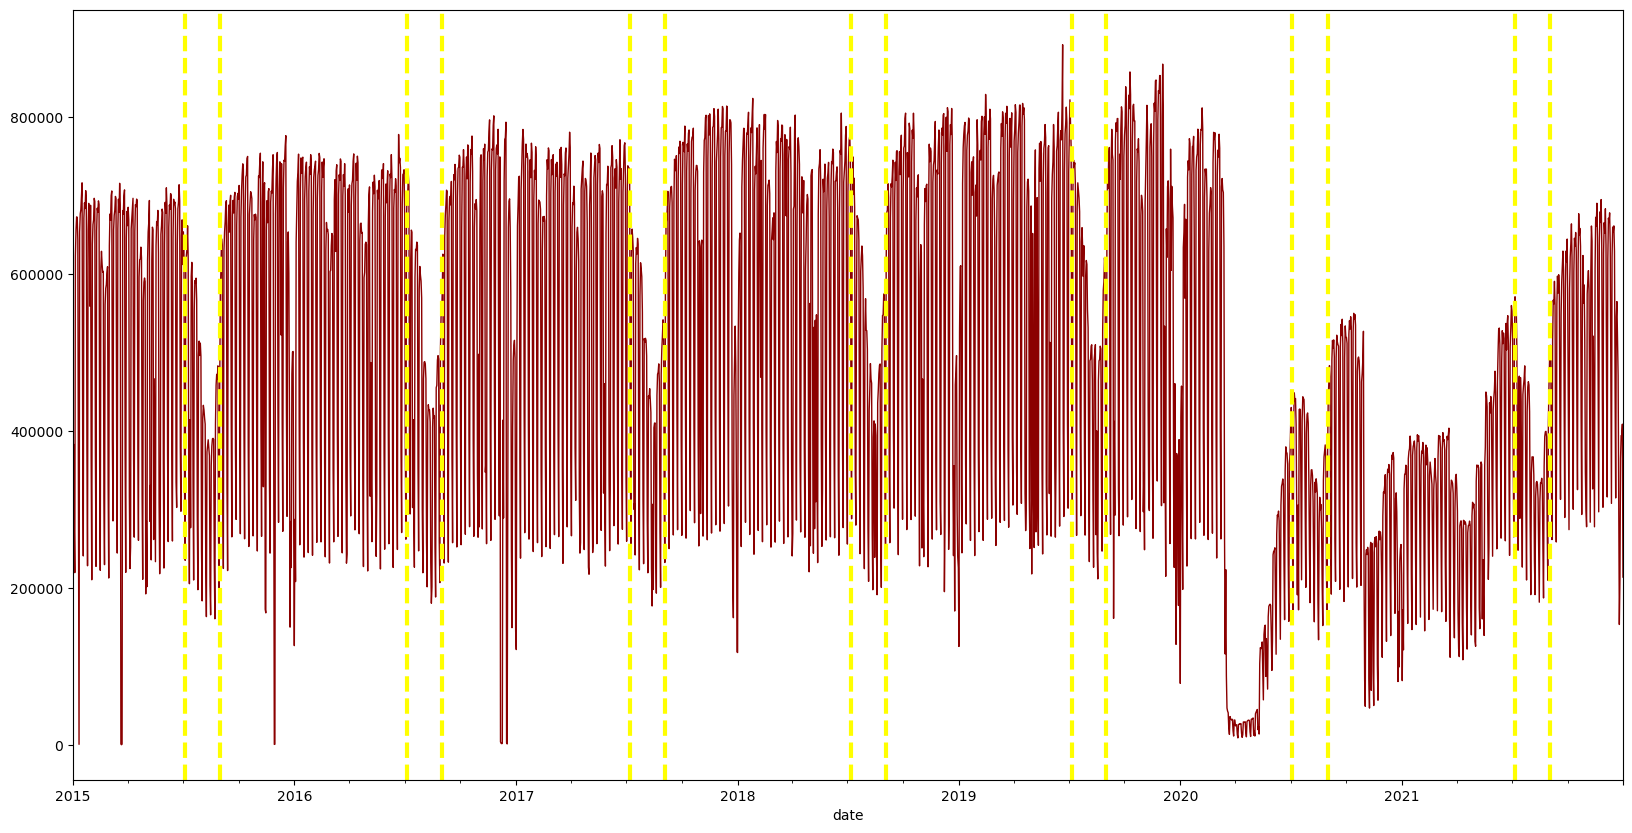

In [7]:
plt.figure(figsize=(20,10))
data["nb_validation"].plot(label="Nombre de validation", c="darkred", lw=1)

# Grandes Vacances
plt.axvline(x="2015-07-04", color="yellow", lw=3, ls="--")
plt.axvline(x="2015-08-31", color="yellow", lw=3, ls="--")

plt.axvline(x="2016-07-05", color="yellow", lw=3, ls="--")
plt.axvline(x="2016-08-31", color="yellow", lw=3, ls="--")

plt.axvline(x="2017-07-08", color="yellow", lw=3, ls="--")
plt.axvline(x="2017-09-03", color="yellow", lw=3, ls="--")

plt.axvline(x="2018-07-07", color="yellow", lw=3, ls="--")
plt.axvline(x="2018-09-02", color="yellow", lw=3, ls="--")

plt.axvline(x="2019-07-06", color="yellow", lw=3, ls="--")
plt.axvline(x="2019-09-01", color="yellow", lw=3, ls="--")

plt.axvline(x="2020-07-04", color="yellow", lw=3, ls="--")
plt.axvline(x="2020-08-31", color="yellow", lw=3, ls="--")

plt.axvline(x="2021-07-06", color="yellow", lw=3, ls="--")
plt.axvline(x="2021-09-01", color="yellow", lw=3, ls="--")

#plt.legend()
plt.savefig('Affluence vs Vacances Ete.pdf', dpi=1000, bbox_inches='tight')
plt.show()

En excluant l'année très particulière 2020, nous remarquons que pendant les périodes de Grandes Vacances, le nombre de validation chute. Ce qui semble cohérent étant donnée que pendant les Grandes Vacance, les franciliens ont tendance à partir hors de Paris.

<h4><font size=4> 1.3.3 Affluence vs Typologie du Jour <a name="Metro_vs_TypeJour"></a></h4>

Il existe une autre information que l'on ne voit pas sur le graphique mais qu'il serait intéressant de montrer. Pour cela, nous allons cette fois-ci nous concentrer sur le nombre de validation selon le type de jour. 

<Figure size 1000x500 with 0 Axes>

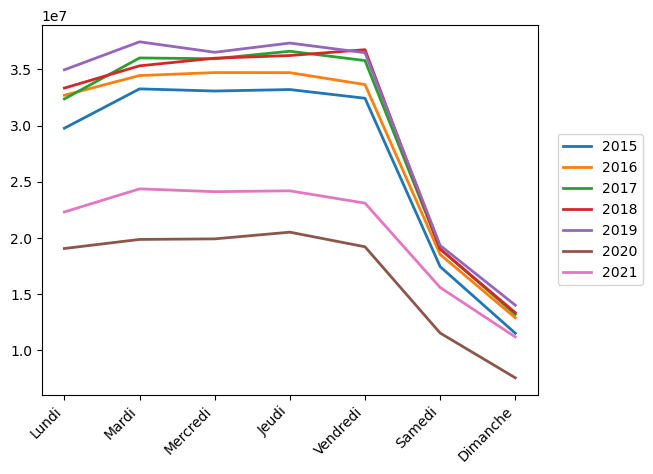

In [8]:
df_typo_jours = pd.read_csv("Bases/Base_Type_jours.csv", sep=",")
liste_annee = [2015+k for k in range(0,7)]

plt.figure(figsize=(10,5))
fig, ax = plt.subplots(1)

X_plot = dict()
Y_plot = dict()
for annee in liste_annee :
    df_temp = df_typo_jours[(df_typo_jours['annee'] == annee)]
    X_plot[str(annee)] = df_temp["type_jour"].to_list()
    Y_plot[str(annee)] = df_temp["nb_validation"].to_list()

for annee in liste_annee :
    ax.plot(X_plot[str(annee)], Y_plot[str(annee)], label=str(annee), linewidth=2)
    plt.xticks(rotation=45, ha="right")
    ax.legend(fontsize=10, bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    #ax.set_title("Nombre de validation par typologie de jour")
    
plt.savefig('Affluence vs Typologique de Jours.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Nous remarquons clairement que le week-end, en particulier le Dimanche, le nombre de validato-ion est bcp plus bas que le reste de la semaine.

<h2><font size=6> 2. Construction des modèles <a name="Construction"></a></h2>

Maintenant que nous avons analyser superficiellement nos données, nous allons essayer de répondre à notre problématique. Pour cela, nous allons tout d'abord préparer nos données puis construire les modèles de prédictions.

<h3><font size=5> 2.1. Préparation des données <a name="PréparationDonnées"></a></h3>

Il est important de préparer les données pour que le modèle soit le plus pertinent, en particulier lorsqu'il s'agit de séries temporelles. 

<font color=red>Plus d'explications ...

<h4><font size=4> 2.1.1. Retraitement des données <a name="RetraitementDonnees"></a></h4>

Regardons les données que nous avons :

In [9]:
data.drop(['type_jour', 'type_mois'], axis=1, inplace=True)
#data.fillna('Aucun', inplace=True)
data.tail(2)

,ferie,fete,greve,vacance,confinement,couvre_feu,nb_validation,num_jour,num_mois,annee
date,,,,,,,,,,
2021-12-30,Aucun,Aucun,Aucun,Noël,Aucun,Aucun,409121,3,12,2021
2021-12-31,Aucun,Aucun,Aucun,Noël,Aucun,Aucun,214174,4,12,2021


La différence entre des données supervisées lambda et des données provenant d'une série temporelle est que les données d'une séries temporelles dépendent du temps, plus particulièrement le futur dépend du passé. Ainsi, nous avons besoin de garder les données du passé quelque part, et quoi de mieux que de créer des variables qui stockerons ces données du passé ! 

C'est pourquoi nous définissons une fonction **series_to_supervised** qui permettrait de transorfmer une série temporelle en données supervisées. De plus, nous avons ajouté un paramètre *historique* qui détermine la fenêtre d'historique que nous voulons avoir pour prédire notre variable cible. Pour un argument historique qui vaut 1, nous aurons alors les données à t-1 pour prédire t; pour une argument historique qui vaut 3, nous aurons les données à t-1, t-2, et t-3 pour prédire t.

Nos modèles fonctionnent beaucoup mieux sur des données normalisées. C'est pourquoi, la fonction permet également de les normaliser. Nous faisons aussi en sorte que les données soient tous des floatants.

In [10]:
data.head()

,ferie,fete,greve,vacance,confinement,couvre_feu,nb_validation,num_jour,num_mois,annee
date,,,,,,,,,,
2015-01-01,Jour de l’an,Aucun,Aucun,Noël,Aucun,Aucun,124179,3,1,2015
2015-01-02,Aucun,Aucun,Faible,Noël,Aucun,Aucun,383734,4,1,2015
2015-01-03,Aucun,Aucun,Faible,Noël,Aucun,Aucun,284976,5,1,2015
2015-01-04,Aucun,Aucun,Aucun,Noël,Aucun,Aucun,219823,6,1,2015
2015-01-05,Aucun,Aucun,Aucun,Aucun,Aucun,Aucun,623614,0,1,2015


In [11]:
min_max_scaler = MinMaxScaler((0,1))
label_encoder = LabelEncoder()

def series_to_supervised(data, historique) :   
    df = data.copy()
    
    for col in ['ferie', 'fete', 'greve', 'vacance', 'confinement', 'couvre_feu', 'annee'] :
        df[col] = label_encoder.fit_transform(df[col]) # on encode toutes nos variables catégorielles

    df = df.astype('float32') # nous voulons que des floatants

    columns_data = list(df.columns) # on récupère la liste de nos variables
    for hist in range(1,historique+1) :
        for col_name in columns_data :
            df[col_name+"(t-"+str(hist)+")"] = df[col_name].shift(hist) # nous ajoutons l'historique de chaqu'une de nos variables
        
    #df.fillna(0.0, inplace=True)
    return df

Afin de respecter les tendances hebdomadaires, nous choisissons d'avoir une fenêtre d'historique de 1 an. Ayons choisi une telle fenêtre d'historique, nous devons ne pas considérer les données de la première année vu que nous n'aurons pas toute l'historique.

In [12]:
historique = 365*1
data_supervised_true = series_to_supervised(data=data, historique=historique)
data_supervised_true = data_supervised_true[historique:].drop(['ferie','fete', 'greve', 'vacance',
                                                               'confinement','couvre_feu',
                                                               'num_jour','num_mois','annee'], axis=1)

Voyons ce que nous obtenons :

In [13]:
data_supervised_true.head(3)

,nb_validation,ferie(t-1),fete(t-1),greve(t-1),vacance(t-1),confinement(t-1),couvre_feu(t-1),nb_validation(t-1),num_jour(t-1),num_mois(t-1),annee(t-1),ferie(t-2),fete(t-2),greve(t-2),vacance(t-2),confinement(t-2),couvre_feu(t-2),nb_validation(t-2),num_jour(t-2),num_mois(t-2),annee(t-2),ferie(t-3),fete(t-3),greve(t-3),vacance(t-3),confinement(t-3),couvre_feu(t-3),nb_validation(t-3),num_jour(t-3),num_mois(t-3),annee(t-3),ferie(t-4),fete(t-4),greve(t-4),vacance(t-4),confinement(t-4),couvre_feu(t-4),nb_validation(t-4),num_jour(t-4),num_mois(t-4),annee(t-4),ferie(t-5),fete(t-5),greve(t-5),vacance(t-5),confinement(t-5),couvre_feu(t-5),nb_validation(t-5),num_jour(t-5),num_mois(t-5),annee(t-5),ferie(t-6),fete(t-6),greve(t-6),vacance(t-6),confinement(t-6),couvre_feu(t-6),nb_validation(t-6),num_jour(t-6),num_mois(t-6),annee(t-6),ferie(t-7),fete(t-7),greve(t-7),vacance(t-7),confinement(t-7),couvre_feu(t-7),nb_validation(t-7),num_jour(t-7),num_mois(t-7),annee(t-7),ferie(t-8),fete(t-8),greve(t-8),vacance(t-8),confinement(t-8),couvre_feu(t-8),nb_validation(t-8),num_jour(t-8),num_mois(t-8),annee(t-8),ferie(t-9),fete(t-9),greve(t-9),vacance(t-9),confinement(t-9),couvre_feu(t-9),nb_validation(t-9),num_jour(t-9),num_mois(t-9),annee(t-9),ferie(t-10),fete(t-10),greve(t-10),vacance(t-10),confinement(t-10),couvre_feu(t-10),nb_validation(t-10),num_jour(t-10),num_mois(t-10),annee(t-10),ferie(t-11),fete(t-11),greve(t-11),vacance(t-11),confinement(t-11),couvre_feu(t-11),nb_validation(t-11),num_jour(t-11),num_mois(t-11),annee(t-11),ferie(t-12),fete(t-12),greve(t-12),vacance(t-12),confinement(t-12),couvre_feu(t-12),nb_validation(t-12),num_jour(t-12),num_mois(t-12),annee(t-12),ferie(t-13),fete(t-13),greve(t-13),vacance(t-13),confinement(t-13),couvre_feu(t-13),nb_validation(t-13),num_jour(t-13),num_mois(t-13),annee(t-13),ferie(t-14),fete(t-14),greve(t-14),vacance(t-14),confinement(t-14),couvre_feu(t-14),nb_validation(t-14),num_jour(t-14),num_mois(t-14),annee(t-14),ferie(t-15),fete(t-15),greve(t-15),vacance(t-15),confinement(t-15),couvre_feu(t-15),nb_validation(t-15),num_jour(t-15),num_mois(t-15),annee(t-15),ferie(t-16),fete(t-16),greve(t-16),vacance(t-16),confinement(t-16),couvre_feu(t-16),nb_validation(t-16),num_jour(t-16),num_mois(t-16),annee(t-16),ferie(t-17),fete(t-17),greve(t-17),vacance(t-17),confinement(t-17),couvre_feu(t-17),nb_validation(t-17),num_jour(t-17),num_mois(t-17),annee(t-17),ferie(t-18),fete(t-18),greve(t-18),vacance(t-18),confinement(t-18),couvre_feu(t-18),nb_validation(t-18),num_jour(t-18),num_mois(t-18),annee(t-18),ferie(t-19),fete(t-19),greve(t-19),vacance(t-19),confinement(t-19),couvre_feu(t-19),nb_validation(t-19),num_jour(t-19),num_mois(t-19),annee(t-19),ferie(t-20),fete(t-20),greve(t-20),vacance(t-20),confinement(t-20),couvre_feu(t-20),nb_validation(t-20),num_jour(t-20),num_mois(t-20),annee(t-20),ferie(t-21),fete(t-21),greve(t-21),vacance(t-21),confinement(t-21),couvre_feu(t-21),nb_validation(t-21),num_jour(t-21),num_mois(t-21),annee(t-21),ferie(t-22),fete(t-22),greve(t-22),vacance(t-22),confinement(t-22),couvre_feu(t-22),nb_validation(t-22),num_jour(t-22),num_mois(t-22),annee(t-22),ferie(t-23),fete(t-23),greve(t-23),vacance(t-23),confinement(t-23),couvre_feu(t-23),nb_validation(t-23),num_jour(t-23),num_mois(t-23),annee(t-23),ferie(t-24),fete(t-24),greve(t-24),vacance(t-24),confinement(t-24),couvre_feu(t-24),nb_validation(t-24),num_jour(t-24),num_mois(t-24),annee(t-24),ferie(t-25),fete(t-25),greve(t-25),vacance(t-25),confinement(t-25),couvre_feu(t-25),nb_validation(t-25),num_jour(t-25),num_mois(t-25),...,ferie(t-341),fete(t-341),greve(t-341),vacance(t-341),confinement(t-341),couvre_feu(t-341),nb_validation(t-341),num_jour(t-341),num_mois(t-341),annee(t-341),ferie(t-342),fete(t-342),greve(t-342),vacance(t-342),confinement(t-342),couvre_feu(t-342),nb_validation(t-342),num_jour(t-342),num_mois(t-342),annee(t-342),ferie(t-343),fete(t-343),greve(t-343),vacance(t-343),confinement(t-343),couvre_feu(t-343),nb_validation(t-343),num_jour(t

Nous allons maintenant normaliser nos données. En effet, les modèles de prédiction que nous allons construire sont beaucoup plus sensibles à des données normalisées.

In [14]:
data_supervised = np.array(data_supervised_true)
data_supervised = min_max_scaler.fit_transform(data_supervised)

Il est également important de garder nos valeurs réelles pour valider nos prédictions.

In [15]:
df_true = data[historique:]

In [16]:
df_true.head(3)

,ferie,fete,greve,vacance,confinement,couvre_feu,nb_validation,num_jour,num_mois,annee
date,,,,,,,,,,
2016-01-01,Jour de l’an,Aucun,Aucun,Noël,Aucun,Aucun,126826,4,1,2016
2016-01-02,Aucun,Aucun,Aucun,Noël,Aucun,Aucun,287756,5,1,2016
2016-01-03,Aucun,Aucun,Aucun,Noël,Aucun,Aucun,208455,6,1,2016


<h4><font size=4> 2.1.2. Séparation des données d'apprentissage et des données test <a name="Train_Test_Split"></a></h4>

Maintenant que nous avons une fonction qui nous permet d'utiliser nos données proprement. Nous devons séparer nos données en données d'apprentissage et données de test. 

Pour cela, nous allons définir une autre fonction **data_test_supervised** qui permet à partir de données supervisées (l'argument *data*), d'une fenêtre d'historique (l'argument *historique*), d'une date de départ (l'argument *test_start*) et d'une date de fin (l'argument *test_end*), de construire des données de test qui commenceront de *test_start* à *test_end*. Nous voulons également nous positionner en conditions réelles, c'est pourquoi toutes les données concernant le nombre de validation antérieurs à cette date seront remplacées par le floatant $0.0$. 

Donnons un exemple. Supposons que nous sommes le 1er Janvier 2020, que nous avons une fenêtre d'historique de  365 jours et que nous voulons déterminer le nombre de validation du 4 Janvier. Etant le 1er Janvier, nous n'avons pas les données de validation du 2 et 3 Janvier, qui sont les donnnées à *t-1* et *t-2*. La fonction **data_test_supervised** remplacera donc ces données t-1 et t-2 par le $0.0$.

Nous utiliserons cette fonction pour constituer nos données de test, qui vont du 1er Janvier au 31 Décembre 2021. 

Il est également utile d'avoir des données de validation qui nous permettrons de choisir un bon modèle de prédiction, notamment lorsque nous tunerons les hyper-paramètres. Pour cela, nous réitérons ce que nous avons pour obtenir nos données de test mais cette fois ci nous constituons des données de validations qui vont du 1er Janvier 2019 au 31 Décembre 2019.

Pour ce qui est de données d'apprentissage, pour notre prédiction finale sur nos de données de test, nous prendrons comme données d'apprentissage nos données du 1er Janvier 2015 au 31 Décembre 2019. 

En revanche, pour tuner nos hyper-paramètres, nous ferons des prédicitons sur nos données de validaitons. Ainsi, nous prendrons comme données d'apprentissage nos données du 1er Janvier 2015 au 30 Juin 2018.

Récapitulons nos différents données : 
- toutes nos données : du 1er Janvier au 31 Décembre 2021
- données de test : du 1er Janvier 2020 au 31 Décembre 2021
- données de validation : du 1er Juillet 2018 au 31 Décembre 2019
- données d'apprentissage :
    - du 1er Janvier 2015 au 30 Juin 2018 d'une part;
    - du 1er Janvier 2015 au 31 Décembre 2019 d'autre part

In [17]:
def data_test_supervised(data=data_supervised_true, historique=historique, test_start='2020-01-01', test_end='2021-12-31') : 
    #col_names = ['ferie', 'fete', 'greve', 'vacance', 'confinement', 'couvre_feu', 'num_jour', 'num_mois', 'annee']
    df_test = data.loc[test_start:test_end,:] # on récupère sur la période que l'on veut
    
    # on se place en conditions réelles pour les données du futur de moins de 365 jours
    for i in range(1,historique+1) :
        index_temp = df_test.index[0] + timedelta(i)
        if index_temp in list(data.index) :
            for j in range(1,i+1) :
                df_test.loc[index_temp, "nb_validation(t-"+str(j)+")"] = 0.0

    # on se place en conditions réelles pour les données du futur de plus de 365 jours
    for j in range(1,historique+1) :
        index_temp = df_test.index[0] + timedelta(j)
        if index_temp in list(data.index) :
            df_test.loc[index_temp:, "nb_validation(t-"+str(j)+")"] = 0.0
    
    return df_test

In [18]:
data_test = data_test_supervised(test_start='2020-01-01', test_end='2021-12-31')
data_test = min_max_scaler.fit_transform(np.array(data_test))
test_start = data_test.shape[0]
data_train = data_supervised[:-test_start,:]

data_val = data_test_supervised(test_start='2018-07-01', test_end='2019-12-31')
data_val = min_max_scaler.fit_transform(np.array(data_val))
val_start = data_val.shape[0]
data_train2 = data_train[:-val_start,:]

Il faut également que nous séparions les variables explicatives et la variable à expliquer (ici le nombre de validation). 

In [19]:
X_train, y_train = data_train[:,1:], data_train[:,0]
X_test, y_test = data_test[:,1:], data_test[:,0]

X_train2, y_train2 = data_train2[:,1:], data_train2[:,0]
X_val, y_val = data_val[:,1:], data_val[:,0]

print(X_train.shape, X_train2.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_train2.shape, y_test.shape, y_val.shape)

(1461, 3650) (912, 3650) (731, 3650) (549, 3650)
(1461,) (912,) (731,) (549,)


Maintenant que nous avons préparé nos données, nous allons définir les différentes par lesquelles nous allons passer pour construire nos modèles.

<h4><font size=4> 2.1.3. Etape de construction des modèles <a name="Construction_Modèle"></a></h4>

Les étapes que nous ferons pour **TOUS** nos modèles sont les suivantes :
1. Entraînement du modèle sur les données d'apprentissage.
2. Prédiction sur les données de validations et d'apprentissage selon différentes combinaisons d'hyperparamètres.
3. Choix du modèle selon les résultats obtenus lors de l'étape 2.
4. Entraînement du modèles sur les données d'apprentissage et de validation.
5. Prédiction finale sur les données test

<h3><font size=5> 2.2. Un peu de Régression Linéaire : Le modèle Ridge <a name="Ridge"></a></h3>

<h4><font size=4> 2.2.1. Principe <a name="Principe_Ridge"></a></h4>

<h4><font size=4> 2.2.2. Construction du modèle <a name="Construction_Ridge"></a></h4>

Pour construire un bon modèle, il faut optimiser ses hyperparamètres autant que nous le pouvons. Pour un modèle Ridge, le seul hyperparamètre que nous pouvons optimiser est le critère **lambda**. Voyons voir comment nous pouvons l'optimiser. 

<h5><font size=3> 2.2.2.a. Entraînement du modèle Ridge <a name="Train_Ridge"></a></h5>

Tout d'abord, nous allons définir une liste de potentiel **lambda**.

In [20]:
liste_lambda_ridge = [k/2 for k in range(1,19)]
liste_fit_intercept = [True, False]

Nous allons ensuite entraîner notre modèle avec les données d'entraînement avec chacun des paramètres **lambda** de la liste définie, prédire la variable *nb_validation* sur les données de validations et choisir le meilleur **lambda** selon la métrique *mean_squared_error* : le **lambda** choisi aura la plus petite *mean_squared_error* sur les données de validations.

Cependant, si nous prédisons la variable *nb_validation* d'un coup, nous allons rencontrer un problème. En effet, nous allons inélucablement utiliser des données futures (les données à t-1, t-2, ..., t-14) pour prédire le futur (les données à t). Mais en conditions réelles, nous n'avons pas les données futures. Nous devons utiliser les prédictions des instants t-1, t-2, ..., t-14 pour prédire l'instant t. Nous allons faire en sorte d'être en conditions réelles. 

Pour cela, nous allons définir deux fonctions :
- **prediction_one_day** : qui permet de déterminer le nombre de validation du jour suivant à partir d'un modèle donné.
- **prediction_futur** : qui permet de déterminer le nombre de validation de données test à partir d'un modèle donné et de données prédites historisées.

In [21]:
def prediction_one_day(model, testX) :
    predy = model.predict(testX)
    return predy[0]

def prediction_futur(model, testX, hist=historique) :
    testX_temp = testX.copy()
    
    predy_futur = []
    while len(testX_temp) != 0 :
        pred_temp = prediction_one_day(model, testX_temp[0:1])
        predy_futur.append(pred_temp)
        testX_temp = testX_temp[1:]
        if len(testX_temp) != 0 :
            for i in range(hist) :
                if len(predy_futur) > i :
                    if  len(testX_temp.shape) == 3 :
                        testX_temp[0,i,6] = predy_futur[-(1+i)][0]
                    else :
                        testX_temp[0,6+10*i] = predy_futur[-(1+i)]
        
    return np.array(predy_futur)

Revenons à l'optimisation de notre modèle Ridge !

Nous allons donc prédire la variable *nb_validation* sur nos données de validations grâce aux deux fonctions décrites plus haut en essayant toutes les combinaisons de la liste des **lambda**. 

Après avoir fait la prédiction, nous devrons aussi inverser le processus de normalisation des données afin d'avoir les vraies prédictions. 

In [22]:
dict_ridge = {'lambda': [], 
              'fit_intercept': [],
             'mse_train': [],
             'mse_val': []}

start_time = time.time()
for lambda_ridge in liste_lambda_ridge :
    for fit_intercept in liste_fit_intercept :
        rid = Ridge(lambda_ridge, fit_intercept=fit_intercept, normalize=False)
        rid.fit(X_train2, y_train2)

        y_pred_val = prediction_futur(rid, X_val)
        y_pred_train = prediction_futur(rid, X_train2)

        mse_train = mean_squared_error(y_train2, y_pred_train)
        mse_val = mean_squared_error(y_val, y_pred_val)

        dict_ridge['lambda'].append(str(lambda_ridge))
        dict_ridge['fit_intercept'].append(str(fit_intercept))
        dict_ridge['mse_train'].append(mse_train)
        dict_ridge['mse_val'].append(mse_val)

print(f'time excution : {time.time() - start_time}')

time excution : 25.875325918197632


In [23]:
results_ridge = pd.DataFrame(dict_ridge)
results_ridge = results_ridge.sort_values(by=['mse_val','mse_train'], ascending=True).set_index(['lambda', 'fit_intercept'])
results_ridge.head()

,,mse_train,mse_val
lambda,fit_intercept,,
9.0,True,0.001878,0.021604
8.5,True,0.001792,0.021710
8.0,True,0.001704,0.021825
7.5,True,0.001613,0.021951
7.0,True,0.001519,0.022089


Nous choisissons maintenant le meilleur **lambda** de notre liste :

In [24]:
lambda_ridge = results_ridge.index[0][0]
fit_intercept = (results_ridge.index[0][1])
print(f'lambda ridge : {lambda_ridge}')
print(f'fit_intercept: {fit_intercept}')

lambda ridge : 9.0
fit_intercept: True


<h5><font size=3> 2.2.2.b. Prédiction du modèle Ridge <a name="Test_Ridge"></a></h5>

Prédisons maintenant nos données de test avec notre meilleur modèle.

In [25]:
rid = Ridge(lambda_ridge, fit_intercept=fit_intercept, normalize=False)
rid.fit(X_train, y_train)

y_pred_test = prediction_futur(rid, X_test)
y_pred_train = prediction_futur(rid, X_train)

# Valeurs prédites
X_pred_test_rid = np.concatenate((y_pred_test.reshape(y_pred_test.shape[0],1),X_test), axis=1)
X_pred_test_rid = min_max_scaler.inverse_transform(X_pred_test_rid)

X_pred_train_rid = np.concatenate((y_pred_train.reshape(y_pred_train.shape[0],1),X_train), axis=1)
X_pred_train_rid = min_max_scaler.inverse_transform(X_pred_train_rid)

X_plot_rid = np.concatenate((X_pred_train_rid[:,0],X_pred_test_rid[:,0]), axis=0)
df_true.loc[:,'y_pred_rid'] = X_plot_rid

Regardons ce que nous obtenons visuellement.

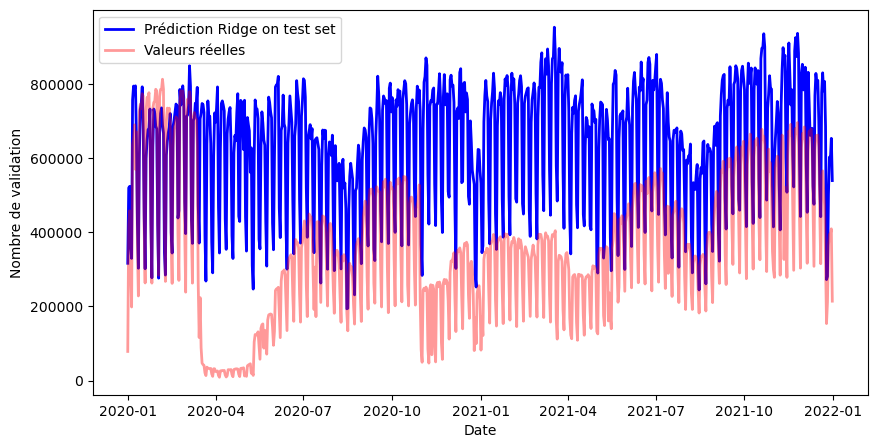

In [26]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_rid'], color="blue", label="Prédiction Ridge on test set", lw=2)
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'nb_validation'], color="red", alpha=0.4, label="Valeurs réelles", lw=2)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prediction Ridge sur test set.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Nous remarquons que les saisonnalités hebdomadaires semble être respectées. En effet, nous pouvons constater que comme pour les données réelles, le nombre de validation chute les week-end pour remonter les lundis.

Cependant nous ne pouvons pas en dire autant des autres saisonnalités. Nous soulignons que pendant la période des Grandes Vacances de 2019 (Juillet et Août 2019), une importante baisse du nombre de validation devrait être relevée ce qui n'est pas le cas. 

Nous concluons donc que ce modèle est plutôt moyen.

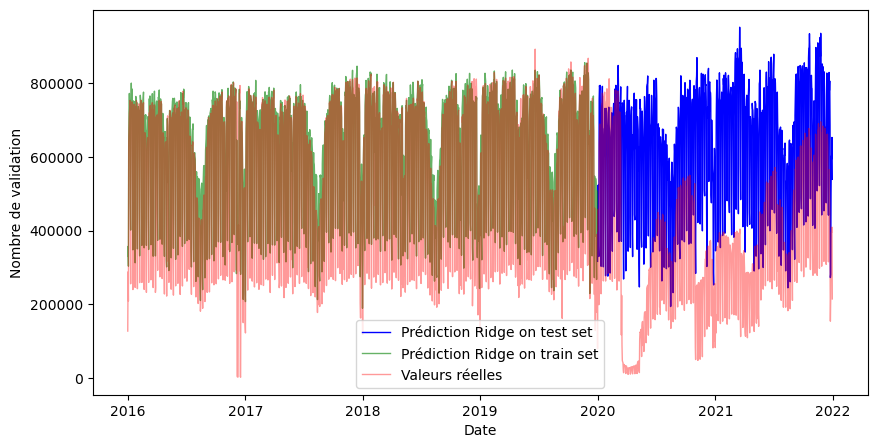

In [28]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_rid'], color="blue", label="Prédiction Ridge on test set", lw=1)
plt.plot(df_true.loc[:df_true[-test_start:].index[0] - timedelta(1),'y_pred_rid'], color="green", alpha=0.6, label="Prédiction Ridge on train set", lw=1)
plt.plot(df_true.loc[:,'nb_validation'], color="red", alpha=0.4, label="Valeurs réelles", lw=1)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend(fontsize=10)

plt.savefig('Prédiction Ridge.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Les données en verts correspondent à la prédiction du modèle Ridge faîte sur les données d'entraînement tandis que les données en bleues correspondent à celle faîte sur les données de test. Les données rouges quant à elles, correspondent aux données réelles.

Nous constatons que le modèle Ridge semble un peu mieux s'adapter aux données d'entraînements ce qui suggère l'existence d'un sur-apprentissage.

Passons à la construction d'un autre modèle : un modèle Random Forest.

<h3><font size=5> 2.3. Un peu de Bagging : Le modèle Random Forest <a name="RandomForest"></a></h3>

<h4><font size=4> 2.3.1. Principe <a name="Principe_RandomForest"></a></h4>

Une **Random Forest** (Forêt d'arbres de décision) est une technique qui fait partie des **méthodes d'ensemble**. Elle qui combine :<br>
- **Les arbres de décision**<br>
- **Le Bagging**<br>

*Le principe* : Au lieu d'entrainer un seul arbre de décision, nous allons entrainer plusieurs arbres **différents** (constitués de sous-ensembles d'individus et de variables séléctionnés aléatoirement) de telle sorte à réduire la corréaltion entre les arbres. Le **résultat final** est obtenu par **moyenne** des résultats de tous les arbres de décision.<br>

C’est l’assemblage de tous ces arbres ("**weak learners**") qui rend extrêmement performante la prédiction.
<img src="RF.jpeg" width=600 height="400"/>

<h4><font size=4> 2.3.2. Construction du modèle <a name="Construction_RandomForest"></a></h4>

Nous allons réitérer les mêmes étapes que pour le modèle précédent. Récapitulons les étapes :
1. Entraînement du modèle sur les données d'apprentissage.
2. Prédiction sur les données de validations et d'apprentissage selon différentes combinaisons d'hyperparamètres.
3. Choix du modèle selon les résultats obtenus lors de l'étape 2.
4. Entraînement du modèles sur les données d'apprentissage et de validation.
5. Prédiction finale sur les données test.

<h5><font size=3> 2.3.2.a. Entraînement du modèle RandomForest <a name="Train_RandomForest"></a></h5>

Il y a beaucoup plus d'**hyperparamètres** pour une modèle RandomForest qu'un modèle Ridge, nous allons donc optimiser plus d'hyperparamètres (pas tous parce qu'il y en a quand même beaucoup).

Voici la liste des hyperparamètres et les combinaisons de ces hyperparammètres que nous allons tester :<br>
- **max_depth**<br>
- **min_samples_split**<br>
- **min_samples_leaf**

Le paramètre **max_depth** de Random Forest définit la **profondeur maximale** des arbres de décision dans l'ensemble. Plus la profondeur des arbres est grande, plus le modèle peut être complexe et mieux il peut s'adapter aux données, mais cela augmente également le risque de surapprentissage. Un modèle qui surapprend les données de formation peut ne pas généraliser correctement aux nouvelles données et ainsi avoir de moins bonnes performances sur l'ensemble de test ou sur des données en production.

Le paramètre **max_depth** peut être utilisé pour contrôler la complexité du modèle en limitant la profondeur des arbres. Une valeur plus petite signifie que les arbres seront plus simples et que le modèle sera moins complexe. Cela peut aider à prévenir le **surapprentissage** et à améliorer la généralisation du modèle.

Le paramètre **min_samples_split** de Random Forest détermine le **nombre minimal d'échantillons** requis pour effectuer un **split** sur un noeud de l'arbre de décision. Plus précisément, si un noeud contient moins d'échantillons que la valeur de **min_samples_split**, l'algorithme ne tentera pas de splitter ce noeud et le noeud sera considéré comme une feuille de l'arbre de décision.

Le paramètre **min_samples_leaf** de Random Forest détermine le nombre minimal d'échantillons requis pour être considéré comme une feuille de l'arbre de décision. Plus précisément, si un noeud de l'arbre de décision contient moins d'échantillons que la valeur de **min_samples_leaf**, l'algorithme considérera ce noeud comme une feuille de l'arbre de décision, même s'il peut être splitté en utilisant la fonction de coût (comme l'entropie ou l'erreur quadratique moyenne).

In [29]:
liste_max_depth = [k for k in range(8,15)]
liste_min_samples_split = [k for k in range(2,7,1)]
liste_min_samples_leaf = [k for k in range(1,5,1)]

In [30]:
print(f'liste_max_depth : {liste_max_depth}')
print(f'liste_min_samples_split : {liste_min_samples_split}')
print(f'liste_min_samples_leaf : {liste_min_samples_leaf}')

liste_max_depth : [4, 5, 6, 7, 8, 9, 10]
liste_min_samples_split : [2, 3, 4, 5, 6]
liste_min_samples_leaf : [1, 2, 3, 4]


In [31]:
dict_rf = {'max_depth': [],
              'min_samples_split': [],
              'min_samples_leaf': [],
              'mse_train': [],
              'mse_val': []}

start_time = time.time()
k = 1
for max_depth in liste_max_depth :
    for min_samples_split in liste_min_samples_split :
        for min_samples_leaf in liste_min_samples_leaf :
            #print(k)
            rf = RandomForestRegressor(max_features='log2', 
                                          max_depth=max_depth,
                                          min_samples_split=min_samples_split,
                                          min_samples_leaf=min_samples_leaf, 
                                       criterion='mse')
                
            rf.fit(X_train2, y_train2)
            y_pred_val = prediction_futur(rf, X_val)
            y_pred_train = prediction_futur(rf, X_train2)

            mse_train = mean_squared_error(y_train2, y_pred_train)
            mse_val = mean_squared_error(y_val, y_pred_val)
                
            dict_rf['max_depth'].append(max_depth)
            dict_rf['min_samples_split'].append(min_samples_split)
            dict_rf['min_samples_leaf'].append(min_samples_leaf)
            dict_rf['mse_train'].append(np.mean(mse_train))
            dict_rf['mse_val'].append(np.mean(mse_val))
            k += 1
                
print(f'time excution : {time.time() - start_time}')

time excution : 2428.065579891205


In [32]:
results_rf = pd.DataFrame(dict_rf)
results_rf = results_rf.sort_values(by=['mse_val','mse_train'], ascending=True).set_index(['max_depth', 'min_samples_split', 'min_samples_leaf'])
results_rf.head()

,,,mse_train,mse_val
max_depth,min_samples_split,min_samples_leaf,,
10,4,2,0.006012,0.018600
9,3,1,0.005786,0.018688
10,5,2,0.005942,0.018722
8,6,1,0.006761,0.018796
10,2,1,0.004283,0.018886


Regardons les meilleurs hyperparamètres que nous avons !

In [33]:
max_depth = results_rf.index[0][0]
min_samples_split = results_rf.index[0][1]
min_samples_leaf = results_rf.index[0][2]

In [34]:
print(f'max_depth : {max_depth}')
print(f'min_samples_split : {min_samples_split}')
print(f'min_samples_leaf : {min_samples_leaf}')

max_depth : 10
min_samples_split : 4
min_samples_leaf : 2


<h5><font size=3> 2.3.2.b. Prédiction du modèle RandomForest <a name="Test_RandomForest"></a></h5>

Une fois que nous avons nos meilleurs hyperparamètres, nous entraînons notre modèle sur les données d'apprentissage finales et nous prédisons nos données de test.

In [35]:
rf = RandomForestRegressor(max_features='log2',
                          max_depth=max_depth,
                          min_samples_split=min_samples_split,
                          min_samples_leaf=min_samples_leaf, 
                           criterion='mse')

rf.fit(X_train, y_train)

y_pred_test = prediction_futur(rf, X_test)
y_pred_train = prediction_futur(rf, X_train)

# Valeurs prédites
X_pred_test_rf = np.concatenate((y_pred_test.reshape(y_pred_test.shape[0],1),X_test), axis=1)
X_pred_test_rf = min_max_scaler.inverse_transform(X_pred_test_rf)

X_pred_train_rf = np.concatenate((y_pred_train.reshape(y_pred_train.shape[0],1),X_train), axis=1)
X_pred_train_rf = min_max_scaler.inverse_transform(X_pred_train_rf)

X_plot_rf = np.concatenate((X_pred_train_rf[:,0],X_pred_test_rf[:,0]), axis=0)
df_true.loc[:,'y_pred_rf'] = X_plot_rf

Regardons ce que notre prédiction donne.

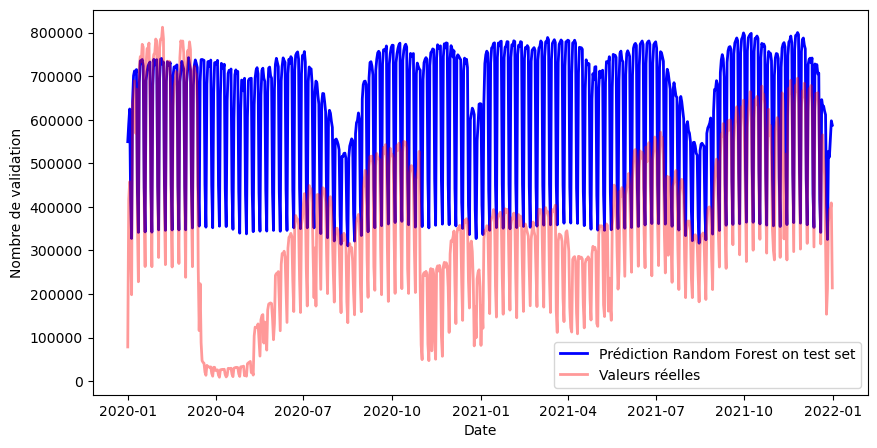

In [36]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_rf'], color="blue", label="Prédiction Random Forest on test set", lw=2)
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'nb_validation'], color="red", alpha=0.4, label="Valeurs réelles", lw=2)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction Random Forest sur test set.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Le modèle Random Forest semble également respecter les saisonnalités hebdomadaire. De plus, nous notons une chute claire du nombre de validation pendant les Grandes Vacances, ce qui montre que les saisonnaltés vacancières semble aussi avoir été respectées.

Cependant, tout comme le modèle Ridge vu précédemment, la période de Covid n'a pas été prise en compte. 

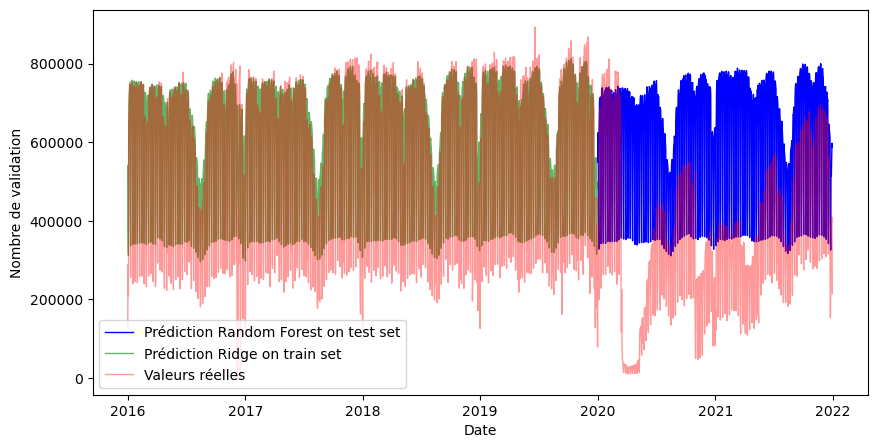

In [38]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_rf'], color="blue", label="Prédiction Random Forest on test set", lw=1)
plt.plot(df_true.loc[:df_true[-test_start:].index[0] - timedelta(1),'y_pred_rf'], color="green", alpha=0.6, label="Prédiction Ridge on train set", lw=1)
plt.plot(df_true.loc[:,'nb_validation'], color="red", alpha=0.4, label="Valeurs réelles", lw=1)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction Random Forest.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Dans ce modèle également un sur-apprentissage a clairement lieu. De plus, il semblerait que le nombre de validation ne puisse pas dépasser une limite inférieure (autour de 350 000 validations) que ce soit dans la prédiction des données d'entraînement ou de test. 

<h3><font size=5> 2.4. Un peu de Boosting : Le modèle XGBoost <a name="XGBoost"></a></h3>

<h4><font size=4> 2.4.1. Principe <a name="Principe_XGBoost"></a></h4>

Dans cette partie nous allons voir une autre **méthode d'ensemble** : le **boosting**.<br>
<br>
*Principe* : Cette fois-ci, les algorithmes ne sont plus indépendants comme pour la Random Forest, au contraire, chaque "weak learner" est entrainé pour **corriger les erreurs** du "weak learner" précédent.<br>
Le boosting travaille de manière **séquentielle**.<br><br><br>
<img src="boosting.png" width=600 height="400"/>
<br><br><br>
La principale différence entre les différents algorithmes de boosting (par exemple XGboost, Gradient boosting, AdaBoost, ...) est la façon dont ils déterminent les **lacunes** des weak learners.<br>
<br>
Nous avons choisi d'entrainer un modèle **XGBoost**.<br>

XGBoost est l'abréviation de Extreme Gradient Boosting, est une mise en œuvre plus performante de l'algorithme du Gradient Boosting.<br>
Cet algorithme est très puissant car il offre un moyen de régler beaucoup plus hyperparamètres que les modèles de boosting classiques. Il peut donc s'adapter à des données plus variées et répondre à différentes problématiques.

<h4><font size=4> 2.4.2. Construction du modèle <a name="Construction_XGBoost"></a></h4>

Nous allons reproduire les mêmes étapes que pour le modèle Random Forest. Récapitulons les étapes :
1. Entraînement du modèle sur les données d'apprentissage.
2. Prédiction sur les données de validations et d'apprentissage selon différentes combinaisons d'hyperparamètres.
3. Choix du modèle selon les résultats obtenus lors de l'étape 2.
4. Entraînement du modèles sur les données d'apprentissage et de validation.
5. Prédiction finale sur les données test.

<h5><font size=3> 2.4.2.a. Entraînement du modèle XGBoost <a name="Train_XGBoost"></a></h5>

Comme pour le modèle Random Forest, il y a beaucoup de paramètre à optimiser.

Voici la liste des hyperparamètres et les combinaisons de ces hyperparammètres que nous allons tester :<br>
- **max_depth**<br>
- **min_samples_split**<br>
- **min_samples_leaf**

Le paramètre **max_depth** de XGBoost définit la **profondeur maximale** des arbres de décision dans l'ensemble d'arbres. Comme nous l'avons soulever précédemment, plus la profondeur des arbres est grande, plus le modèle peut être complexe et mieux il peut s'adapter aux données, mais cela augmente également le risque de surapprentissage.

Le paramètre **subsample** de XGBoost définit le **taux de sous-échantillonnage** des observations à chaque noeud de l'arbre de décision. Plus précisément, lorsque subsample est inférieur à 1.0, XGBoost sélectionne aléatoirement un sous-ensemble des observations à chaque noeud de l'arbre de décision, ce qui peut aider à réduire l'overfitting et à améliorer les performances du modèle.

Par exemple, si **subsample** est défini sur 0.5, XGBoost sélectionnera aléatoirement la moitié des observations à chaque noeud de l'arbre de décision. Cela signifie que chaque arbre de l'ensemble d'arbres sera construit à partir d'un échantillon aléatoire des observations, ce qui peut aider à réduire l'overfitting et à améliorer les performances du modèle sur des données non vues.

Le paramètre **gamma** de XGBoost est un paramètre de **régularisation** qui contrôle la complexité du modèle. Plus précisément, gamma détermine la perte de split minimale nécessaire pour effectuer un split sur un noeud de l'arbre de décision. Plus gamma est élevé, plus il faut de perte de split pour effectuer un split, ce qui peut réduire la complexité du modèle et aider à prévenir l'overfitting.

Lorsque **gamma** est élevé, seuls les splits qui apportent une réduction significative de la perte seront effectués, ce qui peut réduire la complexité du modèle. Cependant, si gamma est trop élevé, le modèle peut devenir trop simple et ne pas capturer suffisamment de détails dans les données, ce qui peut entraîner une perte de performance.

In [39]:
liste_gamma = [k/10 for k in range(1,4,1)]
liste_max_depth = [k for k in range(4,10,1)]
liste_subsample = [0.6, 0.7, 0.8, 0.9]

In [40]:
print(f'gamma : {liste_gamma}')
print(f'max_depth : {liste_max_depth}')
print(f'subsample : {liste_subsample}')

gamma : [0.1, 0.2, 0.3, 0.4, 0.5]
max_depth : [2, 3, 4, 5, 6, 7, 8]
subsample : [0.5, 0.6, 0.7, 0.8, 0.9]


In [41]:
dict_xgb = {'gamma': [],
            'max_depth': [],
            'subsample': [],
            'mse_train': [],
            'mse_val': []}

start_time = time.time()
k = 1
for gamma in liste_gamma :
    for max_depth in liste_max_depth :
        for subsample in liste_subsample :
            #print(k)
            xgb = XGBRegressor(gamma=gamma,
                               max_depth=max_depth,
                               subsample=subsample)
            
            xgb.fit(X_train2, y_train2)
            
            y_pred_val = prediction_futur(xgb, X_val)
            y_pred_train = prediction_futur(xgb, X_train2)

            mse_train = mean_squared_error(y_train2, y_pred_train)
            mse_val = mean_squared_error(y_val, y_pred_val)

            dict_xgb['gamma'].append(gamma)                   
            dict_xgb['max_depth'].append(max_depth)
            dict_xgb['subsample'].append(subsample)
            dict_xgb['mse_train'].append(np.mean(mse_train))
            dict_xgb['mse_val'].append(np.mean(mse_val))
            k += 1

print(f'time excution : {time.time() - start_time}')

time excution : 4491.421875


In [42]:
results_xgb = pd.DataFrame(dict_xgb)
results_xgb = results_xgb.sort_values(by=['mse_val','mse_train'], ascending=True).set_index(['gamma', 'max_depth', 'subsample'])
results_xgb.head()

mse_train   mse_val
gamma max_depth subsample                     
0.1   6         0.9         0.005961  0.015581
0.2   7         0.9         0.010276  0.015607
0.1   2         0.9         0.006092  0.015801
      4         0.8         0.006210  0.016093
      5         0.9         0.005615  0.016227

Regardons les meilleurs hyperparamètres que nous avons !

In [43]:
gamma = results_xgb.index[0][0]
max_depth = results_xgb.index[0][1]
subsample = results_xgb.index[0][2]

In [44]:
print(f'gamma : {gamma}')
print(f'max_depth : {max_depth}')
print(f'subsample : {subsample}')

gamma : 0.1
max_depth : 6
subsample : 0.9


<h5><font size=3> 2.4.2.b. Prédiction du modèle XGBoost <a name="Test_XGBoost"></a></h5>

Une fois que nous avons nos meilleurs hyperparamètres, nous entraînons notre modèle sur les données d'apprentissage finales et nous prédisons nos données de test.

In [45]:
xgb = XGBRegressor(gamma=gamma,
                  max_depth=max_depth,
                  subsample=subsample)

xgb.fit(X_train, y_train)

y_pred_test = prediction_futur(xgb, X_test)
y_pred_train = prediction_futur(xgb, X_train)

# Valeurs prédites
X_pred_test_xgb = np.concatenate((y_pred_test.reshape(y_pred_test.shape[0],1),X_test), axis=1)
X_pred_test_xgb = min_max_scaler.inverse_transform(X_pred_test_xgb)

X_pred_train_xgb = np.concatenate((y_pred_train.reshape(y_pred_train.shape[0],1),X_train), axis=1)
X_pred_train_xgb = min_max_scaler.inverse_transform(X_pred_train_xgb)

X_plot_xgb = np.concatenate((X_pred_train_xgb[:,0],X_pred_test_xgb[:,0]), axis=0)
df_true.loc[:,'y_pred_xgb'] = X_plot_xgb

Regardons ce que notre prédiction donne.

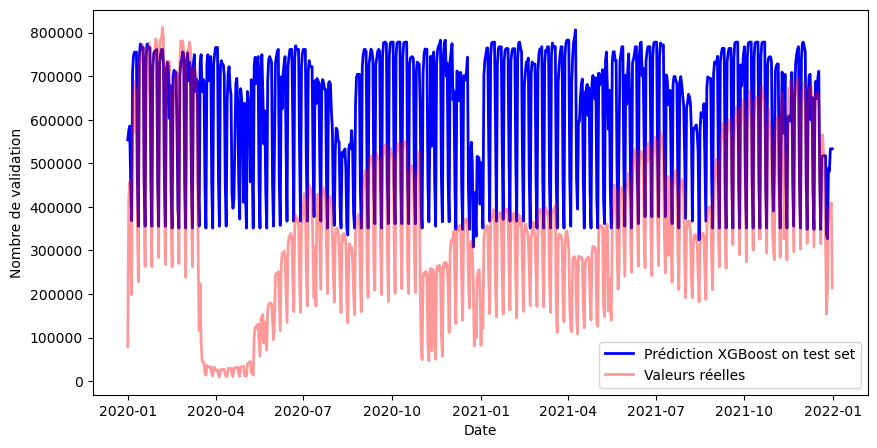

In [46]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_xgb'], color="blue", label="Prédiction XGBoost on test set", lw=2)
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'nb_validation'], color="red", alpha=0.4, label="Valeurs réelles", lw=2)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction XGBoost sur test set.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Le modèle XGBoost semble respecter les saisonnalités hebdomadaires, cependant les saisonnalités vacancières sont moins évidentes.

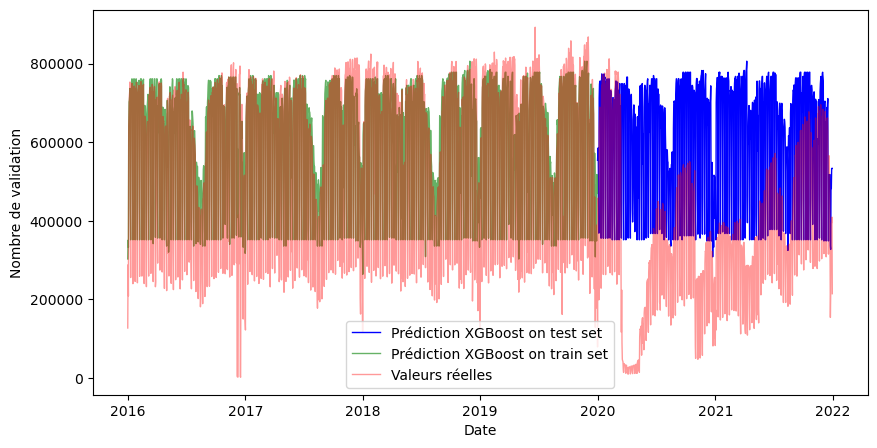

In [48]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_xgb'], color="blue", label="Prédiction XGBoost on test set", lw=1)
plt.plot(df_true.loc[:df_true[-test_start:].index[0] - timedelta(1),'y_pred_xgb'], color="green", alpha=0.6, label="Prédiction XGBoost on train set", lw=1)
plt.plot(df_true.loc[:,'nb_validation'], color="red", alpha=0.4, label="Valeurs réelles", lw=1)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction XGBoost.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Tout comme les modèles précédents, un sur-apprentissage est à constater. De plus, tout comme le modèle Random Forest, le nombre de validation, sur les données d'entraînements et de test, ne dépasse pas une limite inférieure (autour de 350 000 validations).

<h3><font size=5> 2.6. Le modèle LSTM <a name="LSTM"></a></h3>

<h4><font size=4> 2.6.1. Principe <a name="Principe_LSTM"></a></h4>

Les réseaux de neurones **LSTM** (Long Short-Term Memory) sont un type de réseau de neurones capable de mémoriser des informations à long terme et d'utiliser ces informations pour effectuer des prédictions. Très utile dans le cas de séries temporelles. En effet, les réseaux LSTM permettent d'éviter le phénomène de **disparition du gradient**.<br>

La disparition du gradient est un problème qui se produit lors de l'entraînement de réseaux de neuronnes traditionnels où les gradients des paramètres par rapport à la fonction de perte disparaissent exponentiellement avec le nombre de couches ou le nombre de pas de temps. Cela rend difficile pour le réseau d'apprendre des dépendances à long terme.<br>
<br>
Les LSTM résolvent ce problème en introduisant des cellules de mémoire, des portes d'entrée, des portes de sortie et des portes d'oubli, qui permettent au réseau de sélectionner les informations à mémoriser ou à oublier des pas de temps précédents. Cela rend possible pour les LSTM d'apprendre des dépendances à long terme et de faire des prédictions en se basant sur des informations provenant de longues périodes de temps passées.
<img src="lstm.png" width=600 height="400"/>

Le rôle des **trois portes** :
- la **porte d'entrée** décide si l'entrée doit modifier le contenu de la cellule.
- la **porte d'oubli** décide s'il faut remettre à 0 le contenu de la cellule.
- la **porte de sortie** décide si le contenu de la cellule doit influer sur la sortie du neurone.

<h4><font size=4> 2.6.2. Construction du modèle <a name="Construction_LSTM"></a></h4>

Les données d'entrées d'un modèle LSTM nécéssite d'être à 3 dimensions et non à 2. Plus précisément, la taille des données d'entrées doit être (samples, time_step, features) où samples désigne le nombre de données que nous avons, time_step désigne le nomre de données historisées dont nous avons besoins pour prédire une données à un instant t et enfin features désigne le nombre de variables de départ que nous avons à notre disposition. 

Ainsi, nous devons redéfinir la taille de nos données d'entrées. Faisons donc le nécessaire !

In [49]:
samples = X_train.shape[0]
time_step = historique
features = len(data.columns)

In [50]:
print(f'samples : {samples}')
print(f'time_step : {time_step}')
print(f'features : {features}')

samples : 1461
time_step : 365
features : 10


In [51]:
# reshape input to be 3D [samples, timesteps, features]
X_train_LSTM = X_train.reshape((X_train.shape[0], historique, features))
X_test_LSTM = X_test.reshape((X_test.shape[0], historique, features))


y_train_LSTM = y_train.reshape(y_train.shape[0],1)
y_test_LSTM = y_test.reshape(y_test.shape[0],1)

print(X_train_LSTM.shape, y_train_LSTM.shape, X_test_LSTM.shape, y_test_LSTM.shape)

(1461, 365, 10) (1461, 1) (731, 365, 10) (731, 1)


<h5><font size=3> 2.6.2.a. Entraînement du modèle LSTM <a name="Train_LSTM"></a></h5>

In [52]:
# design network
lstm = Sequential()
lstm.add(layers.LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
lstm.add(layers.Dense(1))

2023-01-12 12:22:01.118099: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [53]:
optimiser = Adam(learning_rate=0.01)
lstm.compile(optimizer=optimiser,
             loss='mse')
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                12200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 12,251
Trainable params: 12,251
Non-trainable params: 0
_________________________________________________________________


<h5><font size=3> 2.6.2.b. Prédiction du modèle LSTM <a name="Test_LSTM"></a></h5>

In [54]:
lstm_history = lstm.fit(X_train_LSTM, 
                              y_train_LSTM, 
                              epochs=80, 
                              batch_size=32, 
                              verbose=2, shuffle=False)

Epoch 1/80
46/46 - 33s - loss: 0.0713 - 33s/epoch - 707ms/step
Epoch 2/80
46/46 - 11s - loss: 0.0342 - 11s/epoch - 250ms/step
Epoch 3/80
46/46 - 21s - loss: 0.0210 - 21s/epoch - 451ms/step
Epoch 4/80
46/46 - 11s - loss: 0.0194 - 11s/epoch - 242ms/step
Epoch 5/80
46/46 - 9s - loss: 0.0166 - 9s/epoch - 192ms/step
Epoch 6/80
46/46 - 8s - loss: 0.0181 - 8s/epoch - 164ms/step
Epoch 7/80
46/46 - 8s - loss: 0.0164 - 8s/epoch - 164ms/step
Epoch 8/80
46/46 - 8s - loss: 0.0168 - 8s/epoch - 169ms/step
Epoch 9/80
46/46 - 11s - loss: 0.0154 - 11s/epoch - 249ms/step
Epoch 10/80
46/46 - 11s - loss: 0.0164 - 11s/epoch - 247ms/step
Epoch 11/80
46/46 - 12s - loss: 0.0154 - 12s/epoch - 260ms/step
Epoch 12/80
46/46 - 12s - loss: 0.0157 - 12s/epoch - 256ms/step
Epoch 13/80
46/46 - 11s - loss: 0.0149 - 11s/epoch - 246ms/step
Epoch 14/80
46/46 - 15s - loss: 0.0157 - 15s/epoch - 316ms/step
Epoch 15/80
46/46 - 18s - loss: 0.0148 - 18s/epoch - 387ms/step
Epoch 16/80
46/46 - 14s - loss: 0.0141 - 14s/epoch - 297m

In [ ]:
y_pred_test_LSTM = prediction_futur(lstm, X_test_LSTM)
y_pred_test_LSTM = y_pred_test_LSTM.reshape(y_pred_test_LSTM.shape[0])

y_pred_train_LSTM = prediction_futur(lstm, X_train_LSTM)
y_pred_train_LSTM = y_pred_train_LSTM.reshape(y_pred_train_LSTM.shape[0])

In [56]:
# Valeurs prédites
X_pred_test_LSTM = np.concatenate((y_pred_test_LSTM.reshape(y_pred_test_LSTM.shape[0],1),X_test), axis=1)
X_pred_test_LSTM = min_max_scaler.inverse_transform(X_pred_test_LSTM)

X_pred_train_LSTM = np.concatenate((y_pred_train_LSTM.reshape(y_pred_train_LSTM.shape[0],1),X_train), axis=1)
X_pred_train_LSTM = min_max_scaler.inverse_transform(X_pred_train_LSTM)

X_plot_LSTM = np.concatenate((X_pred_train_LSTM[:,0],X_pred_test_LSTM[:,0]), axis=0)
df_true.loc[:,'y_pred_lstm'] = X_plot_LSTM

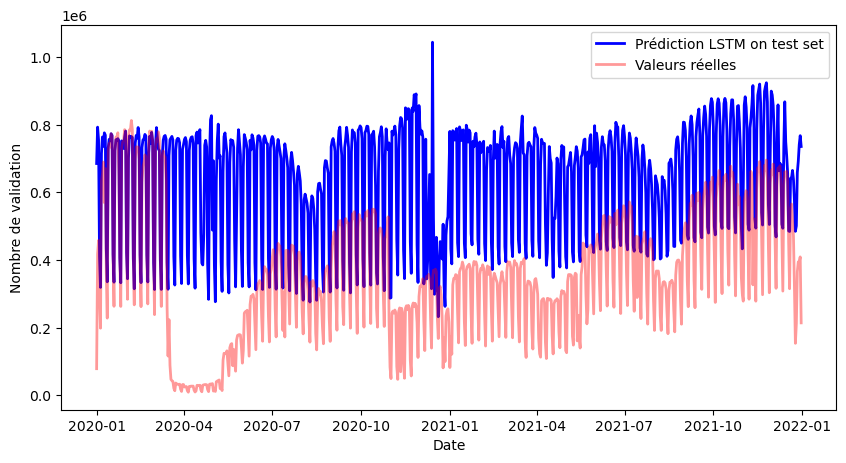

In [57]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_lstm'], color="blue", label="Prédiction LSTM on test set", lw=2)
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'nb_validation'], color="red", alpha=0.4, label="Valeurs réelles", lw=2)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction LSTM sur test set.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Ici également, les saisonnalités hebdomadaires semblent être respectées. Les saisonnalités vacancières semblent quant à elle moins évidents. 

En revanche, nous constatons l'arrivée d'une nouvelle tendance à partir d'Octobre 2021. Cependant, cette nouvelle tendance ne coïncide pas avec la tendance liée au Covid et ses restrictions.

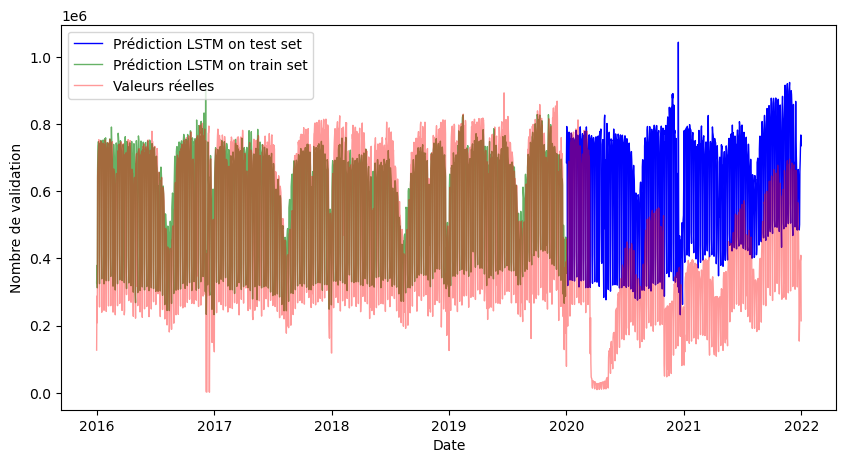

In [59]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_lstm'], color="blue", label="Prédiction LSTM on test set", lw=1)
plt.plot(df_true.loc[:df_true[-test_start:].index[0] - timedelta(1),'y_pred_lstm'], color="green", alpha=0.6, label="Prédiction LSTM on train set", lw=1)
plt.plot(df_true.loc[:,'nb_validation'], color="red", alpha=0.4, label="Valeurs réelles", lw=1)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction LSTM.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Le modèle LSTM semble bien s'adapter aux données d'entraînement mais pas aux données de test, ce qui suggère ici aussi un sur-apprentissage.

<h2><font size=6> 3. Combinaison de modèles <a name="Aggregation"></a></h2>

Dans la partie précédente, nous avons construits plusieurs modèles de prédiction : un modèle de Ridge, un modèle Random Forest, un modèle XGBoost et un modèle LSTM. Nous avons également tuner les hyper-paramètres pour avoir des combinaisons d'hyper-paramètres pertinentes. 

Nous allons maintenant voir si nous pouvons construire d'autres modèles plus robustes et efficace à partir de ces derniers. Pour cela, nous allons utiliser des techniques de combinaisons de modèles, c'est-à-dire que nous allons non pas utiliser un seul des modèles construits mais les utiliser en même temps. 

<h3><font size=5> 3.1. Principe <a name="Principe_Comb"></a></h3>

Il existe plusieurs méthodes pour combiner plusieurs modèles de prédiction. Nous allons en décrire quelques unes. 

##### La méthode par vote majoritaire

Cette méthode consiste à prendre en considération les prédictions de chacun des modèles. Chaque modèle "vote" pour sa prédiction et la prédiction finale sera celle qui aura reçu le plus de votes. 

Cette méthode est intéressante pour un enjeu de classification mais pas pour un enjeu de régression. En effet, pour un enjeu de régression, la probabilité pour que plusieurs modèles "vote" pour la même prédiction vaut 0, d'où l'abscence d'intérêt de cette méthode dans notre cas. 

##### La méthode par régression

Cette méthode nécessite de construire un nouveau modèle de prédiction. En effet, cette méthode considère les prédictions des autres modèles comme des features et les utilise au sein d'un nouveau modèle de prédiction pour pouvoir faire une prédiction finale.

L'avantage de cette méthode est qu'elle peut s'utiliser dans un enjeu de classification mais aussi dans un enjeu de régression. 

##### La méthode par moyenne

Cette fois-ci, nous allons parler d'une méthode qui nous vient le plus instictivement : celle de prendre comme prédiction finale la moyenne des prédictions de chacun des modèles. Cette méthode à l'inverse de celle par vote majoritaire est intéressante pour un enjeu de régression mais pas pour un enjeu de classification.

Cependant cette méthode peut poser un problème. En effet, chacune des modèles choisis impactera de la même façon la prédiction finale. Il suffit donc que l'un des modèles choisi soit mauvais pour que notre prédiction finale soit mauvaise. 

##### La méthode par poids

Cette méthode a des similarités avec la méthode par moyenne. Cependant, ici nous utilisons une moyenne pondérée plutôt qu'une moyenne classique. Expliquons un peu plus en détail. 

Chacun des modèles sera évalué selon leur performance et se verra attribuer une note. Cette note servira à "classer" les modèles du meilleur au moins bon. Nous normaliserons par la suite cette note, qui deviendra un poids, pour que la somme des notes de tous les modèles soit égal à 1. Nous calculerons enfin la moyenne pondérée des prédictions de chaque modèles associée à leur poids.

Cette méthode est plus intéressante que la méthode par moyenne car elle permet aux meilleurs modèles d'avoir plus d'impact sur la prédiction final que les moins bons modèles.

Pour notre projet, nous avons choisi d'utiliser la méthode par poids que nous jugeons la plus pertinente.

<h3><font size=5> 3.1. Agrégation Offline <a name="Agg_Offline"></a></h3>

Tout d'abord, nous allons faire ce que nous appelons une agrégation offline, c'est-à-dire que nous allons calculer une seule fois les poids que nous attribuer à chacun des modèles et faire une seule prédiction sur nos données de test. Nous pouvons voir cela comme si nous nous positionnons le 1er Janvier 2020 en ayant aucune données futur sur le nombre de validation.

Lorsque nous avons décrit la méthode des poids, nous avons suggéré que nous devons évaluer chacun des modèles selon leur performance et leur attribuer une note. Dans notre cas, nous choisi d'évaluer nos modèles grâce à l'**erreur quadratique moyenne** ou **mean squared error** (MSE).

##### Qu'est-ce que l'erreur quadratique moyenne (MSE) ?

L'erreur quadratique moyenne (MSE) est la distance moyenne au carré entre les valeurs observées et prédites donné par la formule suivante : 

<br>
<center> $MSE = \sum^{n}_{i = 1} {(y_i - \hat{y_i})^2}$ </center>


Comme elle utilise des unités au carré plutôt que les unités de données naturelles, l'interprétation est moins intuitive.

Le fait de mettre au carré les différences a plusieurs objectifs.

Tout d'abord, mettre au carré les différences élimine les valeurs négatives pour les différences et garantit que l'erreur quadratique moyenne est toujours supérieure ou égale à zéro. C'est presque toujours une valeur positive. Seul un modèle parfait sans erreur produit un MSE de zéro. Et cela ne se produit pas en pratique.

De plus, mettre au carré augmente l'impact des erreurs plus importantes. Ces calculs pénalisent de manière disproportionnée les erreurs plus importantes par rapport aux erreurs plus petites. Cette propriété est essentielle lorsque nous voulons que votre modèle ait des erreurs plus petites.

Maintenant que nous avons définis l'erreur quadratique moyenne, nous allons l'utiliser pour attribuer une note, puis un poids à nos modèles. Regardons les étapes que nous avons faits : 

1. Calculer la MSE de chacun des modèles sur les données d'entraînement
2. Normaliser la MSE calculer à l'étape 1
3. Attribuer une note à chacun de modèle avec la formule : 

<br>
<center> $note_{modèle_{j}} = 1 - MSE_{normalisé}$ </center>

4. Calculer le poids de chaque modèle avec la formule : 

<br>
<center> $poids_{modèle_{j}} = \frac{note_{modèle_{j}}}{\sum_{i = 1}^{nb_{modèle}} {note_{modèle_{i}}}}$ </center>

Une fois les poids attribués à chacun des modèles, nous calculons la prédiction finale en faisant une moyenne pondérée de chacune des prédictions des modèles.

Toutes les étapes du calcul des poids et la prédicition finale de l'agrégation offline sont faîtes dans une même fonction.

In [60]:
def model_agg_offline(liste_model=['rid', 'rf', 'xgb', 'lstm'], day='2015-01-14') :
    start_time = time.time()
    
    dict_mse = {'model': liste_model,
               'mse': []}
    liste_ypred = []
    
    for mod in liste_model :
        mse_temp = mean_squared_error(df_true.loc['2015':'2019','nb_validation'],df_true.loc['2015':'2019','y_pred_'+mod])
        dict_mse['mse'].append(mse_temp)
        
        liste_ypred.append(df_true.loc[day:,'y_pred_'+mod])
        
    results_mse = pd.DataFrame(dict_mse).set_index('model')
    
    results_mse['mse.norm'] = results_mse['mse'] / results_mse['mse'].sum()
    results_mse['poids_model'] = 1 - results_mse['mse.norm']
    results_mse['poids_model'] /= results_mse['poids_model'].sum()

    ypred_agg = liste_ypred[0]*results_mse.loc['rid', 'poids_model'] + liste_ypred[1]*results_mse.loc['rf', 'poids_model'] + liste_ypred[2]*results_mse.loc['xgb', 'poids_model'] + liste_ypred[3]*results_mse.loc['lstm', 'poids_model']
    
    df_true.loc[day:,'y_pred_agg_offline'] = ypred_agg
    
    print("time execution :", time.time() - start_time)
    
    return results_mse
        

La fonction **model_agg** permet également de récupérer les poids attribués à chaque modèle.

In [61]:
poids_agg_offline = model_agg_offline()

time execution : 0.09886288642883301


Regardons ce que nous obtenons visuellement.

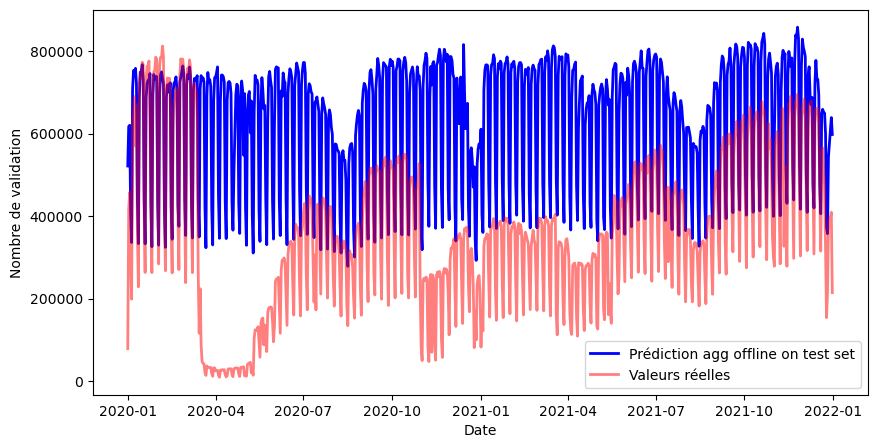

In [156]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc['2020-01-01':,'y_pred_agg_offline'], color="blue", label="Prédiction agg offline on test set", lw=2)
plt.plot(df_true.loc['2020-01-01':,'nb_validation'], color="red", alpha=0.5, label="Valeurs réelles", lw=2)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction Agg Offline.pdf', dpi=1000, bbox_inches='tight')
plt.show()

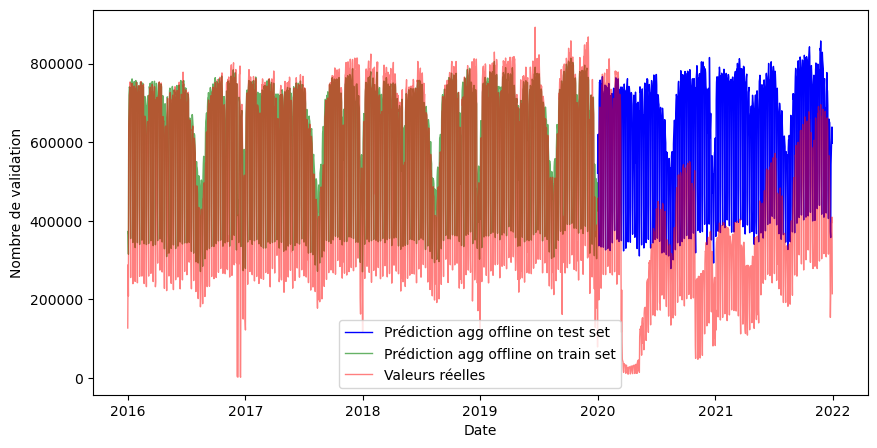

In [62]:
plt.figure(figsize=(10,5))
plt.plot(df_true.loc['2020-01-01':,'y_pred_agg_offline'], color="blue", label="Prédiction agg offline on test set", lw=1)
plt.plot(df_true.loc[:'2019-12-31','y_pred_agg_offline'], color="green", alpha=0.6, label="Prédiction agg offline on train set", lw=1)
plt.plot(df_true.loc[:,'nb_validation'], color="red", alpha=0.5, label="Valeurs réelles", lw=1)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction Agg Offline.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Les mêmes remarques que celles faîtes pour les précédents modèles peuvent être faîtes :
- Les saisonnalités hebdomaires semblent être respectées sur les données d'entraînements et de test.
- Les saisonalités vacancières semblent également être respectées.
- Un sur-apprentissage est à relever.

Regardons maintenant les différents poids attribués à chaque modèle :

In [157]:
poids_agg_offline['poids_model']

model
rid     0.269554
rf      0.236855
xgb     0.245921
lstm    0.247670
Name: poids_model, dtype: float64

Nous remarquons que le modèle Ridge est celui qui a le plus de poids dans la prediction finale d'Agrégation Offline. A l'inverse, le modèle Random Forest est celui avec le moins de poids.

Cela n'est pas si étonnant étant donné nos graphiques. En effet, le graphique du modèle Random Forest paraissait être le moins bon de nos quatre modèles.

<h3><font size=5> 3.2. Agrégation Online <a name="Agg_Online"></a></h3>

Précédemment, pendant toutes nos prédictions, nous avons predit le nombre de validation sur deux ans, du 1er Janvier 2020 au 31 Décembre 2021. Nous voulions nous positionner en conditions réelles et nous placer au 1er Janvier 2020.

Cependant, nous avons les données réelles du 1er Janvier 2020 au 31 Décembre 2021. De plus, il s'avère qu'en réalité nos données sont actualisées tous les jours sur le site open.data. Ainsi, nous pouvons ajuster nos prédictions. Plus précisément nous pouvons ajuster les poids que nous attribuons à chacun des modèles tout les jours en fonction des précédentes prédictions. 

##### Petit exemple : plaçons nous au 15 Janvier 2020. 

Nous avons notre prédicition faite du 1er Janvier 2020 au 14 Janvier 2020 grâce à l'agrégation offline et au poids attribués à chacun des modèles via l'erreur quadratique moyenne (MSE) sur les données d'entraînements.

Nous allons maintenant calculer l'erreur quadratique moyenne (MSE) sur les données de test du 1er Janvier 2020 au 14 Janvier 2020 pour chacun des modèles. Ce calcul va nous permettre de metre à jour les poids des modèles et refaire une prédiction sur les données de test restantes.

Ainsi, à chaque fois que nos données réelles seront actualisées, nous ajusteront les poids des modèles.

Nos données réelles sont actualisées tous les jours mais par soucis de temps d'éxécution et ressource, nous ferons comme si elles sont actualisées tous les 1er et 15 de chaque mois.

Nous définissons donc une liste de tous les jours où nous actualiserons nos poids et une fonction **model_agg_online**. Cette fois-ci nous utiliserons la MSE calculée sur les 7 jours précédents pour déterminer le poids des modèles àc haque actualisation au lieu de prendre la MSE sur les données d'entraînement. Cela permet d'être plus sensible au derniers jours et donner plus d'influence au modèle qui semble être le plus performant la dernière semaine précédent l'actualisation.

In [106]:
liste_day_update = ['2020-01-01', '2020-01-15', '2020-02-01', '2020-02-15', '2020-03-01', '2020-03-15', '2020-04-01', '2020-04-15', '2020-05-01', '2020-05-15', '2020-06-01', '2020-06-15',
                '2020-07-01', '2020-07-15', '2020-08-01', '2020-08-15', '2020-09-01', '2020-09-15', '2020-10-01', '2020-10-15', '2020-11-01', '2020-11-15', '2020-12-01', '2020-12-15',
                '2021-01-01', '2021-01-15', '2021-02-01', '2021-02-15', '2021-03-01', '2021-03-15', '2021-04-01', '2021-04-15', '2021-05-01', '2021-05-15', '2021-06-01', '2021-06-15',
                '2021-07-01', '2021-07-15', '2021-08-01', '2021-08-15', '2021-09-01', '2021-09-15', '2021-10-01', '2021-10-15', '2021-11-01', '2021-11-15', '2021-12-01', '2021-12-15']

In [107]:
def model_agg_online(liste_model=['rid', 'rf', 'xgb', 'lstm'], liste_update=liste_day_update) :
    start_time = time.time()
    
    liste_poids = []
    
    for day in liste_update : 
        dict_mse = {'model': liste_model,
               'mse': []}
        liste_ypred = []

        for mod in liste_model :
            mse_temp = mean_squared_error(df_true.loc[datetime.strptime(day, "%Y-%m-%d") - timedelta(8):datetime.strptime(day, "%Y-%m-%d") - timedelta(1),'nb_validation'],df_true.loc[datetime.strptime(day, "%Y-%m-%d") - timedelta(8):datetime.strptime(day, "%Y-%m-%d") - timedelta(1),'y_pred_'+mod])
            dict_mse['mse'].append(mse_temp)

            liste_ypred.append(df_true.loc[day:,'y_pred_'+mod])

        results_mse = pd.DataFrame(dict_mse).set_index('model')

        results_mse['mse.norm'] = results_mse['mse'] / results_mse['mse'].sum()
        results_mse['poids_model'] = 1 - results_mse['mse.norm']
        results_mse['poids_model'] /= results_mse['poids_model'].sum()

        ypred_agg = liste_ypred[0]*results_mse.loc['rid', 'poids_model'] + liste_ypred[1]*results_mse.loc['rf', 'poids_model'] + liste_ypred[2]*results_mse.loc['xgb', 'poids_model'] + liste_ypred[3]*results_mse.loc['lstm', 'poids_model']

        df_true.loc[day:,'y_pred_agg_online'] = ypred_agg
        
        liste_poids.append(results_mse)
        
    print("time execution :", time.time() - start_time)
    
    return liste_poids
        

Regardons ce que nos actualisations donnent sur notre prédicition visuellement :

In [108]:
liste_poids_agg_online = model_agg_online()

time execution : 0.6815841197967529


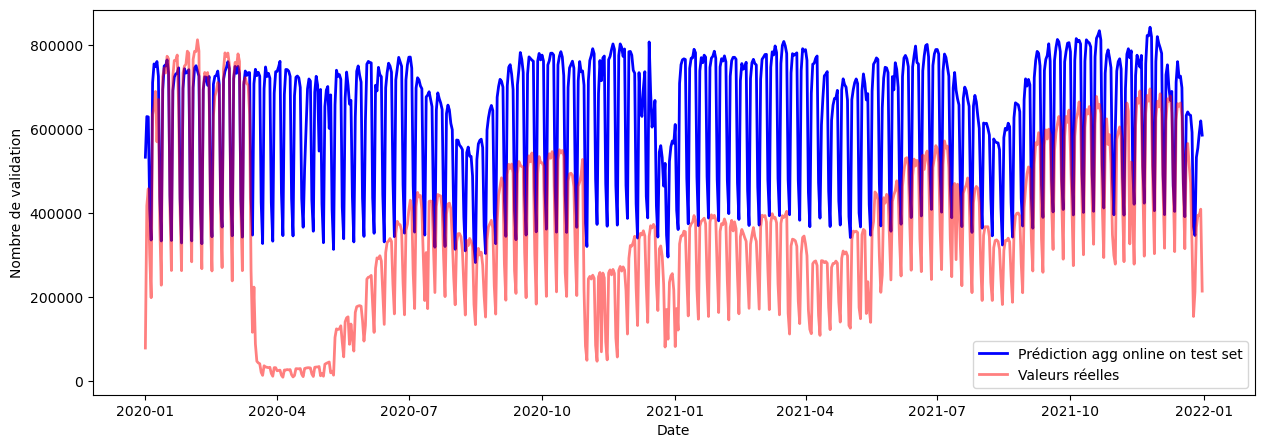

In [159]:
plt.figure(figsize=(15,5))
plt.plot(df_true.loc['2020-01-01':,'y_pred_agg_online'], color="blue", label="Prédiction agg online on test set", lw=2)
#plt.plot(df_true.loc[:'2019-12-31','y_pred_agg_online'], color="green", alpha=0.6, label="Prédiction agg online on train set", lw=1)
plt.plot(df_true.loc['2020-01-01':,'nb_validation'], color="red", alpha=0.5, label="Valeurs réelles", lw=2)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction Agg Online.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Les mêmes remarques que celles faîtes pour les précédents modèles peuvent être faîtes :
- Les saisonnalités hebdomaires semblent être respectées sur les données d'entraînements et de test.
- Les saisonalités vacancières semblent également être respectées.
- Un sur-apprentissage est à relever.

Regardons maintenant comment nos poids évolue en fonction des actualisations : 

In [110]:
liste_poids_rid = []
liste_poids_rf = []
liste_poids_xgb = []
liste_poids_lstm = []

for df in liste_poids_agg_online :
    liste_poids_rid.append(df.loc['rid', 'poids_model'])
    liste_poids_rf.append(df.loc['rf','poids_model'])
    liste_poids_xgb.append(df.loc['xgb','poids_model'])
    liste_poids_lstm.append(df.loc['lstm','poids_model']) 

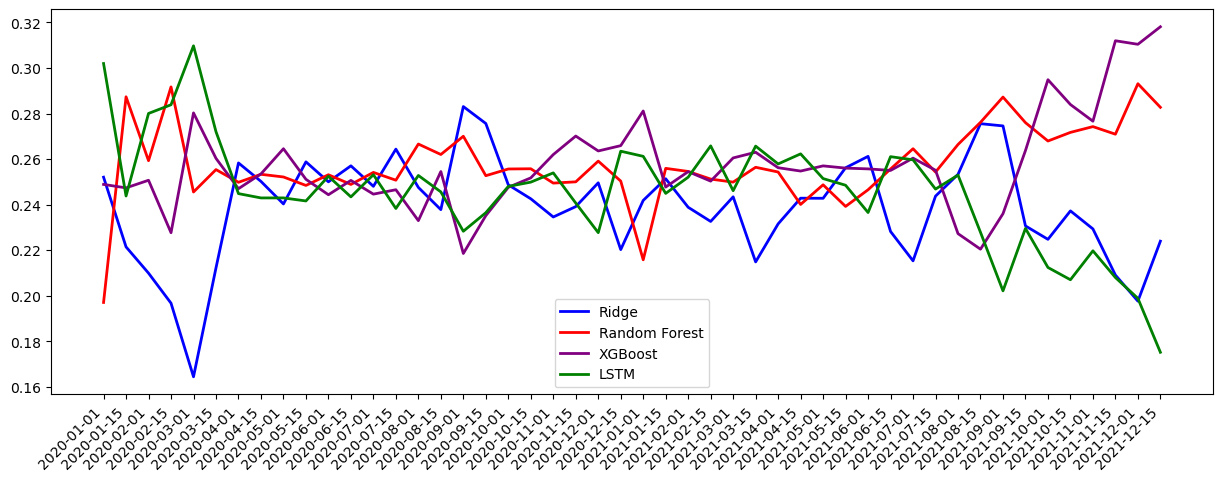

In [171]:
plt.figure(figsize=(15,5))
plt.plot(liste_day_update, liste_poids_rid, color='blue', label='Ridge', lw=2)
plt.plot(liste_day_update, liste_poids_rf, color='red', label='Random Forest', lw=2)
plt.plot(liste_day_update, liste_poids_xgb, color='purple', label='XGBoost', lw=2)
plt.plot(liste_day_update, liste_poids_lstm, color='green', label='LSTM', lw=2)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend()

plt.show()

Nous remarquons que le modèle Ridge est celui qui semble avoir le moins d'influence sur la prédiction finale de l'Agrégation Online. 

Au début du graphe et à la fin du graphe, nous constatons que les poids sont plus hétérogènes. Cela témoigne du fait que la performance des modèles selon la période considérée peut bouger. Ainsi faire évoluer les poids des modèles en fonction des périods peut être pertinent.

<h2><font size=6> 4. Apprentissage en ligne <a name="Online"></a></h2>

Dans les parties précédentes, nous avons certes réussi à améliorer nos modèles cependant un problème persistait : la période Covid.

Nos modèles n'ont pas réussi à être performants lors de la période Covid. Cela s'explique logiquement : les modèles se sont entraînés sur des données hors période Covid donc sur des données où il n'y a jamais eu de confinement ni de couvre-feu. Ils n'auraient pas pu qu'il y aurait une baisse du nombre de valaidation par la suite. D'ailleurs comme une de nos camarades lors de sa présentation l'a suggéré : pouvons-nous dire que qu'un modèle de prédiction est bon si il arrive à prédire des évenements correctement alors qu'il ne s'est jamais entraîner auparavant sur de tels évenements ?

Dans cette partir, nous verrons donc comment gerer la période du Covid. Plus précisément, nous construirons ce que nous appelons un modèle d'apprentissage en ligne que nous allons définir par la suite.

<h3><font size=5> 4.1. Principe <a name="Principe_Online"></a></h3>

L'Apprentissage en ligne a beaucoup de similitue avec l'Aggrégation Online. Pour commencer, l'Apprentissage en ligne permet d'ajuster nos modèles à chaque nouvelle actualisations des données réelles. Cependant, l'Apprentissage en ligne permet en plus de prendre en compte les tendances des nouvelles données réelles. 

Une solution serait d'entraîner nos modèles sur toutes les données que nous avons et enfin faire une prédiction. Cela réglerait notre problème lors de la période Covid. Cependant, cela demande beaucoup de temps et de ressources ce que nous n'avons pas forcément. Nous devons donc trouver une autre solution.

Plutôt que d'entraîner nos modèles sur toutes les données que nous avons, une autre solution serait de construire un nouveau modèle, de l'entraîner sur une période que nous choisissons nous mêmes, nous réduisons ainsi les données d'entraînements de ce modèle ainsi que le temps d'éxécution du programme. Enfin, nous combinons nos modèles initiaux via le dernier modèle que nous avons construits via une agréagtion online. Cette solution est l'Apprentissage en ligne et c'est d'aileurs ce que nous allons utiliser pour notre projet.

En résumé, l'Apprentissage en ligne permet à un modèle de s'adapter en continu aux nouvelles données qui lui sont fournies

<h3><font size=5> 4.2. Construction du modèle d'Apprentissage en ligne <a name="Construction_Learning_Online"></a></h3>

Pour notre modèle d'Apprentissage en ligne, nous choisissons de construire un modèle Random Forest simple que nous allons entraîner sur les 90 jours précédents la prédiction que nous allons faire. 

Nous avons également choisi de ne pas prendre une fenêtre d'historique de 365 jours mais de prendre un fenêtre d'historique de 7 jours afin de donner plus de poids aux tendances récentes.

Ajouter le Random Forest simple :

In [74]:
historique_online_learning = 7
data_supervised_true_online_learning = series_to_supervised(data=data, historique=historique_online_learning)
data_supervised_true_online_learning = data_supervised_true_online_learning[historique_online_learning:].drop(['ferie','fete','greve', 'vacance',
                                                                   'confinement','couvre_feu',
                                                                   'num_jour','num_mois','annee'], axis=1)
data_supervised_online_learning = np.array(data_supervised_true_online_learning)
data_supervised_online_learning = min_max_scaler.fit_transform(data_supervised_online_learning)


In [75]:
for day in liste_day_update :
    #print(day)
    data_test_online_learning = data_test_supervised(data=data_supervised_true_online_learning, test_start=day, test_end='2021-12-31', historique=historique_online_learning)
    data_test_online_learning = min_max_scaler.fit_transform(np.array(data_test_online_learning))
    test_start_online_learning = data_test_online_learning.shape[0]
    data_train_online_learning = data_supervised_online_learning[-test_start_online_learning-45:-test_start_online_learning,:]

    X_train_online_learning, y_train_online_learning = data_train_online_learning[:,1:], data_train_online_learning[:,0]
    X_test_online_learning, y_test_online_learning = data_test_online_learning[:,1:], data_test_online_learning[:,0]

    simple_rf = RandomForestRegressor()

    simple_rf.fit(X_train_online_learning, y_train_online_learning)

    y_pred_test_online_learning = prediction_futur(simple_rf, X_test_online_learning, hist=historique_online_learning)
    y_pred_train_online_learning = prediction_futur(simple_rf, X_train_online_learning, hist=historique_online_learning)

    # Valeurs prédites
    X_pred_test_simple_rf = np.concatenate((y_pred_test_online_learning.reshape(y_pred_test_online_learning.shape[0],1),X_test_online_learning), axis=1)
    X_pred_test_simple_rf = min_max_scaler.inverse_transform(X_pred_test_simple_rf)

    X_pred_train_simple_rf = np.concatenate((y_pred_train_online_learning.reshape(y_pred_train_online_learning.shape[0],1),X_train_online_learning), axis=1)
    X_pred_train_simple_rf = min_max_scaler.inverse_transform(X_pred_train_simple_rf)

    X_plot_simple_rf = np.concatenate((X_pred_train_simple_rf[:,0],X_pred_test_simple_rf[:,0]), axis=0)
    df_true.loc[datetime.strptime(day, "%Y-%m-%d") - timedelta(45):,'y_pred_simple_rf'] = X_plot_simple_rf


In [174]:
liste_day_update = ['2020-01-15', '2020-02-01', '2020-02-15', '2020-03-01', '2020-03-15', '2020-04-01', '2020-04-15', '2020-05-01', '2020-05-15', '2020-06-01', '2020-06-15',
                '2020-07-01', '2020-07-15', '2020-08-01', '2020-08-15', '2020-09-01', '2020-09-15', '2020-10-01', '2020-10-15', '2020-11-01', '2020-11-15', '2020-12-01', '2020-12-15',
                '2021-01-01', '2021-01-15', '2021-02-01', '2021-02-15', '2021-03-01', '2021-03-15', '2021-04-01', '2021-04-15', '2021-05-01', '2021-05-15', '2021-06-01', '2021-06-15',
                '2021-07-01', '2021-07-15', '2021-08-01', '2021-08-15', '2021-09-01', '2021-09-15', '2021-10-01', '2021-10-15', '2021-11-01', '2021-11-15', '2021-12-01', '2021-12-15']

In [78]:
df_true.loc['2020-01-01':,'y_pred_online_learning'] = df_true.loc['2020-01-01':,'y_pred_agg_online']
        

In [79]:
def model_online_learning(liste_model=['agg_online', 'simple_rf'], liste_update=liste_day_update) :
    start_time = time.time()
    
    liste_poids = []
    
    for day in liste_update :
        #print(day)
        dict_mse = {'model': liste_model,
                   'mse': []}
        liste_ypred = []

        for mod in liste_model :
            #print(mod)
            mse_temp = mean_squared_error(df_true.loc[datetime.strptime(day, "%Y-%m-%d") - timedelta(14):datetime.strptime(day, "%Y-%m-%d") - timedelta(1),'nb_validation'],df_true.loc[datetime.strptime(day, "%Y-%m-%d") - timedelta(14):datetime.strptime(day, "%Y-%m-%d") - timedelta(1),'y_pred_'+mod])
            dict_mse['mse'].append(mse_temp)
            #print(mod, ":", mse_temp)

            liste_ypred.append(df_true.loc[day:,'y_pred_'+mod])

        results_mse = pd.DataFrame(dict_mse).set_index('model')

        results_mse['mse.norm'] = results_mse['mse'] / results_mse['mse'].sum()
        results_mse['poids_model'] = 1 - results_mse['mse.norm']
        results_mse['poids_model'] /= results_mse['poids_model'].sum()

        ypred_agg = liste_ypred[0]*results_mse.loc['agg_online', 'poids_model'] + liste_ypred[1]*results_mse.loc['simple_rf', 'poids_model']

        df_true.loc[day:,'y_pred_online_learning'] = ypred_agg
        
        liste_poids.append(results_mse)

    print("time execution :", time.time() - start_time)
    
    return liste_poids
        

In [80]:
poids_online_learning = model_online_learning()

time execution : 0.48999881744384766


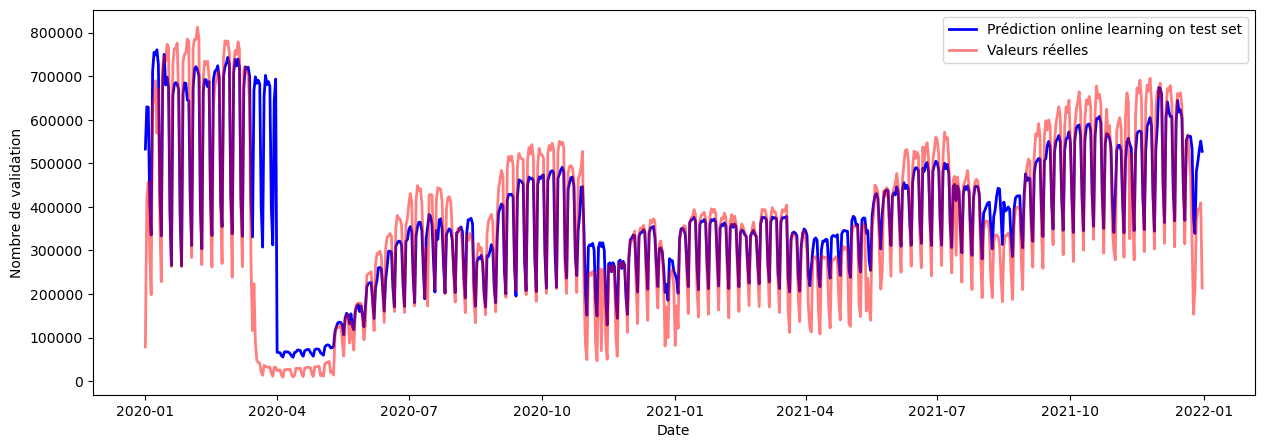

In [172]:
plt.figure(figsize=(15,5))
plt.plot(df_true.loc['2020-01-01':,'y_pred_online_learning'], color="blue", label="Prédiction online learning on test set", lw=2)
plt.plot(df_true.loc['2020-01-01':,'nb_validation'], color="red", alpha=0.5, label="Valeurs réelles", lw=2)
plt.xlabel("Date")
plt.ylabel("Nombre de validation")
plt.legend()

plt.savefig('Prédiction Agg Online.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Nous constatons plusieurs choses :
- Les saisonnalités hebdomadaires semblent avoir été respectées.
- Les saisonnalités vacancières semblent avoir été également respectées.

Nous remarquons aussi que les tendances liées au Covid ont été respectées ! Le modèle d'Apprentissage en ligne semble être le plus performant de nos modèles.

In [175]:
liste_poids_agg_online = []
liste_poids_simple_rf = []

for df in poids_online_learning :
    liste_poids_agg_online.append(df.loc['agg_online', 'poids_model'])
    liste_poids_simple_rf.append(df.loc['simple_rf','poids_model'])

<function matplotlib.pyplot.show(close=None, block=None)>

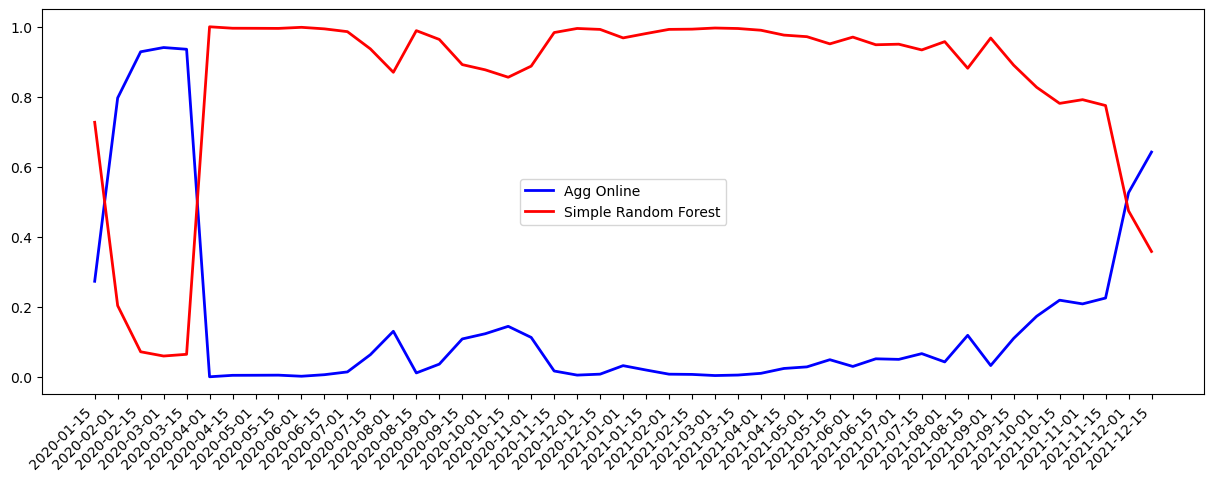

In [177]:
plt.figure(figsize=(15,5))
plt.plot(liste_day_update, liste_poids_agg_online, color='blue', label='Agg Online', lw=2)
plt.plot(liste_day_update, liste_poids_simple_rf, color='red', label='Simple Random Forest', lw=2)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend()

plt.show

Nous remarquons que le poids du modèle d'Agrégation Online est tout d'abord plus important que le modèle Simple Random Forest. Cela se comprend car le modèle d'Agrégation Online s'est entraîné sur plus de données et utilise une fenêtre d'historique de 365 jours contre 45 jours. 

Néanmoins, nous relevons qu'à partir du moment où le premier Confinement du Covid a lieu, les poids s'inversent. Cela s'explique également. En effet, contrairement au modèle Agrégation Online, le modèle Simple Random Forest a pu s'entrainer sur des données Covid ce qui explique qu'il soit plus performant que le modèle Agrégation Online.

Les poids finissent par s'inverser à la fin de nos données test, ce qui s'explique par le fait que les tendances liées aux Covid commencent s'atténuer.

<h2><font size=6> 5. Analyse des résultats <a name="Comparaison"></a></h2>

<h3><font size=5> 5.1. Analyse des métriques <a name="Metriques"></a></h3>

Nous allons maintenant analyser différentes métriques : 
- l'erreur quadratique moyenne (MSE) que nous avons déjà vu précédemment
- l'ecart quadratique moyen (RMSE)
- et l'erreur absolue moyenne (MAE)

<h4><font size=4> 5.1.1. Définitions <a name="Def_Metriques"></a></h4>

<h5><font size=3> 5.1.1.a. Erreur quadratique moyenne (MSE) et Ecart qudratique moyen (RMSE) <a name="MSE_RMSE"></a></h5>

La Root Mean Squared Error (RMSE) et la Mean Squared Error (MSE) sont les métriques de régression les plus courantes. Du fait de leurs propriétés de régularité, ce sont les métriques historiques pour optimiser les modèles de régression comme la régression linéaire.
Définition

Comme définitp précédemment, la MSE, ou erreur quadratique moyenne, est la moyenne des carrés des erreurs, définie par la formule : 

<center>
$\begin{equation*} MSE = \frac{1}{n} \sum_{i=1}^n (y_i – \hat{y}_i)^2 \end{equation*} $
</center>

La RMSE, ou racine de l’erreur quadratique moyenne, est – comme son nom l’indique – la racine carrée de la MSE. Mathématiquement, elle est définie par : 

<center>
$\begin{equation*} RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i – \hat{y}_i)^2} \end{equation*}$
</center>

Contrairement à la MSE, la RMSE s’exprime dans la même unité que la variable à prédire et est par conséquent plus facile à interpréter. Ces métriques quantifient les erreurs réalisées par le modèle. Plus elles sont élevées, moins le modèle est performant.

##### Propriétés

Les définitions de la RMSE et la MSE leur confèrent plusieurs propriétés à connaître absolument :

- Ces métriques pénalisent plus fortement les grandes erreurs que les petites erreurs. Etant donné le carré dans la somme, une erreur 3 fois plus grande aura 9 fois plus d’impact sur la moyenne
- Par conséquent elles sont très sensibles aux outliers.
Les outliers sont des points pour lesquels la valeur réelle est aberrante. La prédiction sera donc souvent très éloignée de cette valeur aberrante, ce qui accroît fortement la contribution des individus outliers dans ces métriques.
- Elles sont facilement optimisables.
Ces métriques sont dérivables et peuvent être utilisées avec des algorithmes à base de gradient. On peut même dans certains cas obtenir une formule explicite sans avoir à faire d’optimisation stochastique. C’est le cas de la régression par moindres carrés ordinaires (MCO).
Notons que pour un modèle simpliste qui prédirait toutes les observations à la moyenne, la MSE vaut la variance de la variable à prédire et la RMSE son écart-type.

<h5><font size=3> 5.1.1.b. Erreur absolue moyenne (MAE) <a name="MAE"></a></h5>

La MAE est la métrique de régression la plus interprétable, ce qui en fait une métrique populaire malgré son manque de régularité.

La MAE, ou erreur absolue moyenne, est la moyenne des valeurs absolues des erreurs, définie par la formule :

<center> $\begin{equation*}
MAE = \frac{1}{n} \sum_{i=1}^n |y_i – \hat{y}_i|
\end{equation*}$
</center>

La MAE est dans la même unité que la variable à prédire. Par conséquent, elle est facile à interpréter.

Cette métrique quantifie l’erreur réalisée par le modèle. Plus elle est élevée, moins le modèle est performant.

##### Propriétés

Étant donné son interprétabilité et ses propriétés, la MAE peut être utilisée en complément d’autres métriques comme la MSE. Les trois propriétés principales de la MAE sont :

- La MAE pénalise autant les grandes erreurs que les petites erreurs, contrairement à la MSE.
Du fait de l’utilisation d’une valeur absolue dans la somme, une erreur 3 fois plus grande aura 3 fois plus d’impact sur l’erreur.
- Cette métrique est sensible aux outliers.
L’observation d’une valeur aberrante pénalise le modèle, mais moins que pour la MSE.
- Elle est moins régulière et par conséquent moins optimisable que la MSE.
La valeur absolue n’est pas dérivable en 0, ce qui rend la MAE plus compliquée à optimiser que la MSE ou la RMSE.

<h4><font size=4> 5.1.2. Comparaison des métriques <a name="Comp_Metriques"></a></h4>

In [86]:
# Ajout de MSE
results_test = {'model': ['Ridge', 'Random Forest', 'XGBoost', 'LSTM', 
                          'Agg offline', 'Agg online', 'Online Learning']}


In [178]:
# Ajout des MSE
mse_test_rid = mean_squared_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_rid'])
mse_test_rf = mean_squared_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_rf'])
mse_test_xgb = mean_squared_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_xgb'])
mse_test_lstm = mean_squared_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_lstm'])
mse_test_agg_offline = mean_squared_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_agg_offline'])
mse_test_agg_online = mean_squared_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_agg_online'])
mse_test_online_learning = mean_squared_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_online_learning'])

results_test['MSE'] = [mse_test_rid, mse_test_rf, 
                        mse_test_xgb, mse_test_lstm, 
                        mse_test_agg_offline, mse_test_agg_online, 
                        mse_test_online_learning]

In [87]:
# Ajout des RMSE
rmse_test_rid = np.sqrt(mse_test_rid)
rmse_test_rf = np.sqrt(mse_test_rf)
rmse_test_xgb = np.sqrt(mse_test_xgb)
rmse_test_lstm = np.sqrt(mse_test_lstm)
rmse_test_agg_offline = np.sqrt(mse_test_agg_offline)
rmse_test_agg_online = np.sqrt(mse_test_agg_online)
rmse_test_online_learning = np.sqrt(mse_test_online_learning)

results_test['RMSE'] = [rmse_test_rid, rmse_test_rf, 
                        rmse_test_xgb, rmse_test_lstm, 
                        rmse_test_agg_offline, rmse_test_agg_online, 
                        rmse_test_online_learning]

In [88]:
# Ajout des MAE
mae_test_rid = mean_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_rid'])
mae_test_rf = mean_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_rf'])
mae_test_xgb = mean_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_xgb'])
mae_test_lstm = mean_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_lstm'])
mae_test_agg_offline = mean_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_agg_offline'])
mae_test_agg_online = mean_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_agg_online'])
mae_test_online_learning = mean_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_online_learning'])


results_test['MAE'] = [mae_test_rid, mae_test_rf, 
                        mae_test_xgb, mae_test_lstm, 
                        mae_test_agg_offline, mae_test_agg_online, 
                        mae_test_online_learning]

In [89]:
# Ajout des MSLE
msle_test_rid = mean_squared_log_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_rid'])
msle_test_rf = mean_squared_log_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_rf'])
msle_test_xgb = mean_squared_log_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_xgb'])
msle_test_lstm = mean_squared_log_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_lstm'])
msle_test_agg_offline = mean_squared_log_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_agg_offline'])
msle_test_agg_online = mean_squared_log_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_agg_online'])
msle_test_online_learning = mean_squared_log_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_online_learning'])


results_test['MSLE'] = [msle_test_rid, msle_test_rf, 
                        msle_test_xgb, msle_test_lstm, 
                        msle_test_agg_offline, msle_test_agg_online, 
                        msle_test_online_learning]

In [112]:
# Ajout des Median AE
median_ae_test_rid = median_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_rid'])
median_ae_test_rf = median_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_rf'])
median_ae_test_xgb = median_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_xgb'])
median_ae_test_lstm = median_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_lstm'])
median_ae_test_agg_offline = median_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_agg_offline'])
median_ae_test_agg_online = median_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_agg_online'])
median_ae_test_online_learning = median_absolute_error(df_true.loc['2020-01-01':,'nb_validation'], df_true.loc['2020-01-01':,'y_pred_online_learning'])


results_test['Median AE'] = [median_ae_test_rid, median_ae_test_rf, 
                        median_ae_test_xgb, median_ae_test_lstm, 
                        median_ae_test_agg_offline, median_ae_test_agg_online, 
                        median_ae_test_online_learning]

In [113]:
# Ajout des biais
moyenne_nb_validation = np.mean(df_true.loc[df_true[-test_start:].index[0]:,'nb_validation'])
esp_empirique_rid = np.mean(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_rid']) - moyenne_nb_validation
esp_empirique_rf = np.mean(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_rf']) - moyenne_nb_validation
esp_empirique_xgb = np.mean(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_xgb']) - moyenne_nb_validation
esp_empirique_lstm = np.mean(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_lstm']) - moyenne_nb_validation
esp_empirique_agg_offline = np.mean(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_agg_offline']) - moyenne_nb_validation
esp_empirique_agg_online = np.mean(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_agg_online']) - moyenne_nb_validation
esp_empirique_online_learning = np.mean(df_true.loc[df_true[-test_start:].index[0]:,'y_pred_online_learning']) - moyenne_nb_validation


results_test['Biais'] = [esp_empirique_rid, esp_empirique_rf, 
                        esp_empirique_xgb, esp_empirique_lstm, 
                        esp_empirique_agg_offline, esp_empirique_agg_online, 
                        esp_empirique_online_learning]


In [179]:
df_results_test = pd.DataFrame(results_test).set_index('model')
df_results_test

,MSE,RMSE,MAE,MSLE,Median AE,Biais
model,,,,,,
Ridge,1.082541e+11,329019.911605,284754.911551,1.215496,246781.625000,279290.139706
Random Forest,9.936951e+10,315229.297450,266950.620301,1.203365,225468.378229,263195.337198
XGBoost,9.652136e+10,310678.869096,264693.130899,1.190230,244629.125000,260863.139706
LSTM,1.084968e+11,329388.449878,280534.185555,1.219883,250496.375000,278956.327206
Agg offline,1.013264e+11,318318.134856,273492.075575,1.206137,242443.532683,270863.873659
Agg online,1.006580e+11,317266.409302,271795.675017,1.204381,240954.104863,269247.098952
Online Learning,1.085830e+10,104203.183599,57745.745045,0.303934,40776.216267,18268.376620


Trions les modèles selon chacunes des métriques :

In [181]:
# Selon la MSE
df_results_test_mse = df_results_test.sort_values(by=['MSE'], ascending=True)
df_results_test_mse

,MSE,RMSE,MAE,MSLE,Median AE,Biais
model,,,,,,
Online Learning,1.085830e+10,104203.183599,57745.745045,0.303934,40776.216267,18268.376620
XGBoost,9.652136e+10,310678.869096,264693.130899,1.190230,244629.125000,260863.139706
Random Forest,9.936951e+10,315229.297450,266950.620301,1.203365,225468.378229,263195.337198
Agg online,1.006580e+11,317266.409302,271795.675017,1.204381,240954.104863,269247.098952
Agg offline,1.013264e+11,318318.134856,273492.075575,1.206137,242443.532683,270863.873659
Ridge,1.082541e+11,329019.911605,284754.911551,1.215496,246781.625000,279290.139706
LSTM,1.084968e+11,329388.449878,280534.185555,1.219883,250496.375000,278956.327206


In [150]:
# Selon la RMSE
df_results_test_rmse = df_results_test.sort_values(by=['RMSE'], ascending=True)
df_results_test_rmse

,MSE,RMSE,MAE,MSLE,Median AE,Biais
model,,,,,,
Online Learning,1.085830e+10,104203.183599,57745.745045,0.303934,40776.216267,18268.376620
XGBoost,9.652136e+10,310678.869096,264693.130899,1.190230,244629.125000,260863.139706
Random Forest,9.936951e+10,315229.297450,266950.620301,1.203365,225468.378229,263195.337198
Agg online,1.006580e+11,317266.409302,271795.675017,1.204381,240954.104863,269247.098952
Agg offline,1.013264e+11,318318.134856,273492.075575,1.206137,242443.532683,270863.873659
Ridge,1.082541e+11,329019.911605,284754.911551,1.215496,246781.625000,279290.139706
LSTM,1.084968e+11,329388.449878,280534.185555,1.219883,250496.375000,278956.327206


In [152]:
# Selon la MSLE
df_results_test_msle = df_results_test.sort_values(by=['MSLE'], ascending=True)
df_results_test_msle

,MSE,RMSE,MAE,MSLE,Median AE,Biais
model,,,,,,
Online Learning,1.085830e+10,104203.183599,57745.745045,0.303934,40776.216267,18268.376620
XGBoost,9.652136e+10,310678.869096,264693.130899,1.190230,244629.125000,260863.139706
Random Forest,9.936951e+10,315229.297450,266950.620301,1.203365,225468.378229,263195.337198
Agg online,1.006580e+11,317266.409302,271795.675017,1.204381,240954.104863,269247.098952
Agg offline,1.013264e+11,318318.134856,273492.075575,1.206137,242443.532683,270863.873659
Ridge,1.082541e+11,329019.911605,284754.911551,1.215496,246781.625000,279290.139706
LSTM,1.084968e+11,329388.449878,280534.185555,1.219883,250496.375000,278956.327206


Il est rassurant de voir que le modèle Online Learning est le plus performant selon la **MSE**, la **RMSE** et la **MSLE**.

En revanche, il est etonnant de voir que les modèles d'Agrégation Online et Offline ne sont pas respectivement en deuxième et troisième position. Une possible explication est que le modèle LSTM (dernier selon la **MSE**, la **RMSE** et la **MSLE**) impacte significativement les différents modèles d'Agregation.

In [154]:
# Selon la MAE
df_results_test_mae = df_results_test.sort_values(by=['MAE'], ascending=True)
df_results_test_mae

,MSE,RMSE,MAE,MSLE,Median AE,Biais
model,,,,,,
Online Learning,1.085830e+10,104203.183599,57745.745045,0.303934,40776.216267,18268.376620
XGBoost,9.652136e+10,310678.869096,264693.130899,1.190230,244629.125000,260863.139706
Random Forest,9.936951e+10,315229.297450,266950.620301,1.203365,225468.378229,263195.337198
Agg online,1.006580e+11,317266.409302,271795.675017,1.204381,240954.104863,269247.098952
Agg offline,1.013264e+11,318318.134856,273492.075575,1.206137,242443.532683,270863.873659
LSTM,1.084968e+11,329388.449878,280534.185555,1.219883,250496.375000,278956.327206
Ridge,1.082541e+11,329019.911605,284754.911551,1.215496,246781.625000,279290.139706


In [153]:
# Selon la Median AE
df_results_test_median_ae = df_results_test.sort_values(by=['Median AE'], ascending=True)
df_results_test_median_ae

,MSE,RMSE,MAE,MSLE,Median AE,Biais
model,,,,,,
Online Learning,1.085830e+10,104203.183599,57745.745045,0.303934,40776.216267,18268.376620
Random Forest,9.936951e+10,315229.297450,266950.620301,1.203365,225468.378229,263195.337198
Agg online,1.006580e+11,317266.409302,271795.675017,1.204381,240954.104863,269247.098952
Agg offline,1.013264e+11,318318.134856,273492.075575,1.206137,242443.532683,270863.873659
XGBoost,9.652136e+10,310678.869096,264693.130899,1.190230,244629.125000,260863.139706
Ridge,1.082541e+11,329019.911605,284754.911551,1.215496,246781.625000,279290.139706
LSTM,1.084968e+11,329388.449878,280534.185555,1.219883,250496.375000,278956.327206


In [115]:
# Selon le Biais
df_results_test_biais = df_results_test.sort_values(by=['Biais'], ascending=True)
df_results_test_biais

,MSE,RMSE,MAE,MSLE,Median AE,Biais
model,,,,,,
Online Learning,1.085830e+10,104203.183599,57745.745045,0.303934,40776.216267,18268.376620
XGBoost,9.652136e+10,310678.869096,264693.130899,1.190230,244629.125000,260863.139706
Random Forest,9.936951e+10,315229.297450,266950.620301,1.203365,225468.378229,263195.337198
Agg online,1.006580e+11,317266.409302,271795.675017,1.204381,240954.104863,269247.098952
Agg offline,1.013264e+11,318318.134856,273492.075575,1.206137,242443.532683,270863.873659
LSTM,1.084968e+11,329388.449878,280534.185555,1.219883,250496.375000,278956.327206
Ridge,1.082541e+11,329019.911605,284754.911551,1.215496,246781.625000,279290.139706


Nous remarquons que peut import la métrique considérée, la hierarchisation des modèles est la même. 

Une bonne chose est que le modèle Online Learning est le plus performant ce qui est rassurant. En revanche, nous pensions que les modèles Agg Online et Agg Offline viendrait respectivement en deuxième position et troisième position ce qui n'est pas le cas. Cela peut s'expliquer par le fait que le modèle LSTM a une influence non négligeable sur ces deux modèles d'Agrégation qui les rendent moins performants que nous pensions.

<h3><font size=5> 5.2. Analyse des résidus <a name="Résidus"></a></h3>

Analysons maintenant les résidus du modèle final choisi : le modèle Online Learning.

In [135]:
res_online_learning = df_true.loc[df_true[-test_start:].index[0]:,'nb_validation'] - df_true.loc[df_true[-test_start:].index[0]:,'y_pred_online_learning']


<h4><font size=4> 5.2.1. Linéarité des résidus <a name="Linéarité_Résidus"></a></h4>

Nous allons tout d'abord tester la linéarité des résidus. Pour cela nous allons prendre une fonction **smooth** que nous avons pris sur le site https://sites.google.com/view/aide-python/statistiques/machine-learning-en-python/r%C3%A9gressions-lin%C3%A9aires-en-python. Cette fonction permet de tracer la courbe corresponde à la moyenne des résidus. 

Cette courbe étant censée être autour de 0 pour prouver la linéarité des résidus.

In [182]:
def smooth(x,y, box_percent=0.05,res=50,median=True):
    surface = max(x)-min(x)
    my_pas = np.arange(min(x),max(x),surface/res)
    box = surface*box_percent
    demi_box = box/2
    y_sortie = np.array([])
    x_sortie = np.array([])
    
    for myx in my_pas :
        temp = [y[i] for i in range(len(x)) if ((x[i]>=(myx-demi_box))and(x[i]<=(myx+demi_box)))]
        if median==True :
            temp_y = np.median(temp)
        else :
            temp_y = np.mean(temp)

        y_sortie = np.append(y_sortie,temp_y)
        x_sortie = np.append(x_sortie,myx)

    return x_sortie, y_sortie

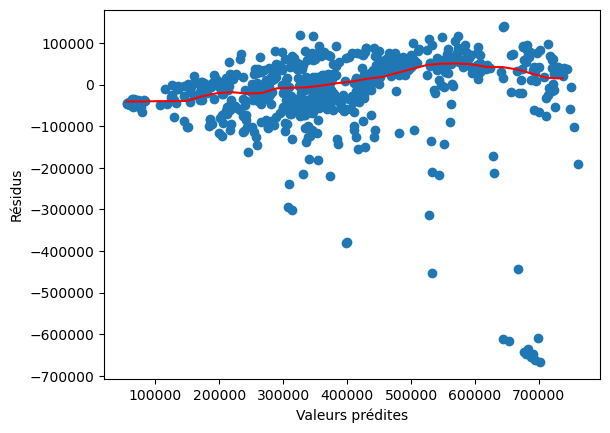

In [185]:
predicted_values_online_learning = df_true.loc[df_true[-test_start:].index[0]:,'y_pred_online_learning']

plt.scatter(predicted_values_online_learning, res_online_learning)
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")

x, y = smooth(predicted_values_online_learning, 
                 res_online_learning, 
                 box_percent=0.25, 
                 res=30)
plt.plot(x, y, color="red")

plt.show()

Nous remarquons que la courbe semble être autour de 0 ce qui montre la linéarité des résidus. 

Nous relevons également des résidus aberrants (entre -600 000 et -700 000). Ces résidus peuvent être due à la chute du nimbre de validations lors du Premeir Confinement. Le modèle Online Learning permettait de s'adapter aux nouvelles données toutes les deux semaines, donc lors des deux premières semaines du Premier Confinement le modèle n'a pas encore eu le temps de s'adapter.

<h4><font size=4> 5.2.2. Indépendance des résidus <a name="Indépendance_Résidus"></a></h4>

Analysons maintenant l'indépendance des résidus.

Commençons par l'analyse visuelle de l'indépendance des résidus.

<h5><font size=4> 5.2.2.a. Graphique d'autocorrélation des résidus (ACF) <a name="ACF"></a></h5>

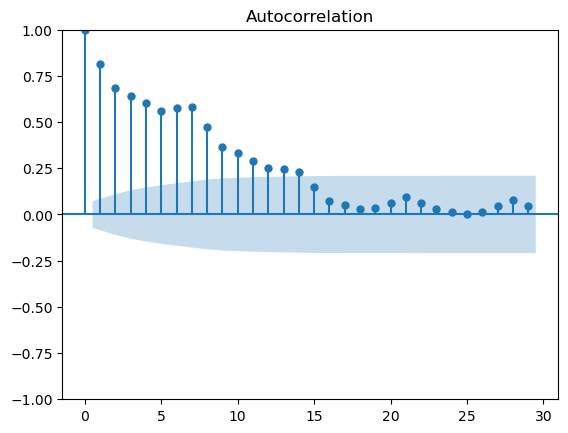

In [143]:
plot_acf(res_online_learning)
plt.show()

Nous remarquons que la corrélation du résidus n et n+14 ne sont pas dans l'intervalle bleue. Cela indique que les résidus de n à n+14 ne sont pas indépendants. Mais cela est logique. En effet, nous utilisons les données des jours précédents le jour t pour prédire le jour t. Les résidus les plus proches ne peuvent donc pas être indépendants. 

Avec ce graphique, nous rejettons donc l'hypothèse d'indépendance des résidus.

Passons maintenant au Test de Durbin-Watson.

<h5><font size=4> 5.2.2.b. Test de Durbin-Watson <a name="DW"></a></h5>

Ce test permet numériquement de déterminer l'indépendance des résidus. 

La statistique de Durbin et Watson est une valeur appartenant à l’intervalle [0;+4]. Elle est dite normale si elle avoisine la valeur 2. 

In [144]:
print(durbin_watson(res_online_learning))

0.3265345138892986


Nous constatons que la statistique est très faible ce qui suggère que les résidus ne sont pas indépendants.

Regardons maintenant la loi des résidus.

<h4><font size=4> 5.2.3. Loi des résidus <a name="Loi_Résidus"></a></h4>

In [145]:
res_online_learning_std = res_online_learning/sqrt(sum(res_online_learning**2)/(len(res_online_learning)-1))

<h5><font size=4> 5.2.3.a. Histogramme des résidus standardisés <a name="Hist_res_std"></a></h5>

Pour rejeter ou non l'hypothèse que les résidus suivent une lois gaussienne centrée réduite par des graphiques, nous pouvons tracer l'histogramme des résidus standardisés et le diagramme Quantile-Quantile (QQ-plot).

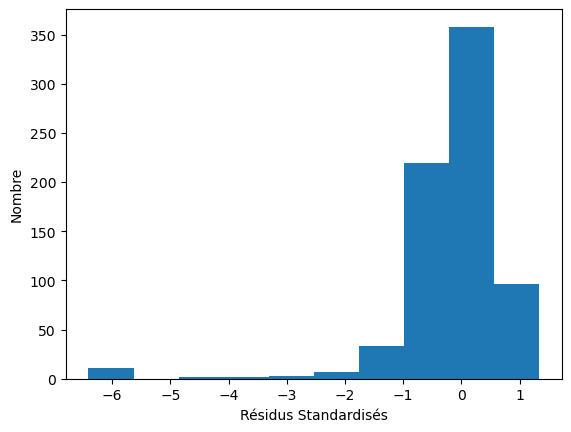

In [186]:
plt.hist(res_online_learning_std)
plt.ylabel('Nombre')
plt.xlabel('Résidus Standardisés')

plt.show()

L'histogramme des résidus standardisés semble montrer l'histogramme d'une loi normale à quelques exeption près.

<h5><font size=4> 5.2.3.b. Diagramme Quantile-Quantile <a name="QQ-plot"></a></h5>

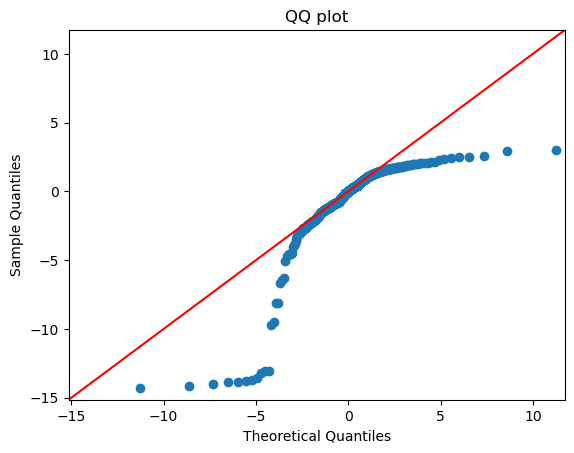

In [147]:
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.qqplot(res_online_learning_std, stats.t, fit=True,line='45')
plt.title("QQ plot")

plt.show()

Le QQ-plot en revanche semble montrer que les résidus ne suivent pas une loi normale. Beaucoup de points bleues sont trop éloignés de la courbe rouge.

Passons maintenant à l'analyse de l'homogénéïté des résidus.

<h4><font size=4> 5.2.4. Homogénéïté des résidus <a name="Homogénéité_Résidus"></a></h4>

In [190]:
sqrt_res_online_learning_std = np.sqrt(np.abs(res_online_learning_std)) 


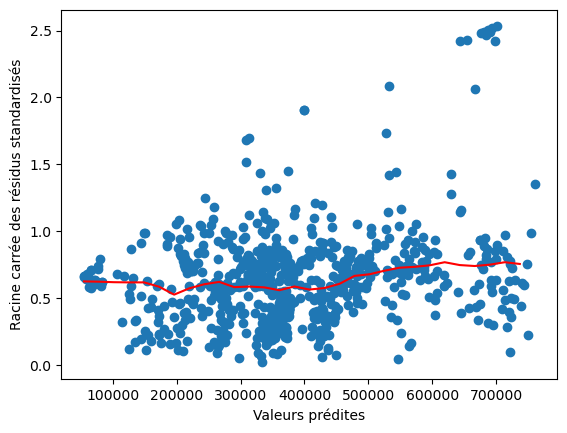

In [192]:
from matplotlib.pyplot import plot, scatter, show, xlabel, ylabel

plt.scatter(predicted_values_online_learning,sqrt_res_online_learning_std)

plt.xlabel("Valeurs prédites")
plt.ylabel("Racine carrée des résidus standardisés")

x, y = smooth(predicted_values_online_learning,
              sqrt_res_online_learning_std,
              box_percent=0.25,
              res=30)
plt.plot(x, y, color="red")

plt.show()

Tout comme pour le graphique lors de l'analyse de la linéarité des résidus, nous remarquons que graphiquement, la variance des résidus semblent homogène à quelques exception près.

<h2><font size=6> 6. Conclusion <a name="Conclusion"></a></h2>

<h3><font size=5> 6.1. Difficultés rencontrées <a name="Difficultes"></a></h3>

Les principales difficultés que nous avons rencontrés ont été sur la création de la base de données finale ainsi que sur la construction des modèles d'Agrégation en ligne et d'Apprentissage en ligne.

D'une part, nous avons du relevé à la main tous les jours féries et les fêtes, ainsi que les périodes de vacances scolaires et les grèves de 2015 à 2021. Cela nous a pris beaucoup de temps et nous pensons qu'en conditons réelles, un projet avec ces motivations là aurait pu avoir accés à des bases de données annexes déja constituées.

D'autre part, nous avons pris du temps à comprendre comment les modèles d'Agrégation en ligne et d'Apprentissage en ligne fonctionnaient. Mais nous avons réussi à venir à bout de ces difficultés !

<h3><font size=5> 6.2. Ouvertures <a name="Ouvertures"></a></h3>

- Il y quelques axes d'améliorations plutôt évidentes comme l'adaptation des modèles à la période Covid et post-Covid. Nous pouvons les traiter en essayant d'intégrer un autre modèle à celui que nous avons choisi pendant ces périodes. 
- La gestion des hyperparamètres peut également être améliorée. En effet, nous étions limitées à nos faibles ressources, cependant du calcul parallèle aurait pu nous permettre de tester beaucoup plus de combinaisons d'hyperparamètre et ainsi d'en choisir de meilleurs. Aussi, l'optimisation des hyperparamètres n'a pas été géré sur le modèle LSTM par manque de temps mais cela aurait également pu être fait. 
- La période Covid a eu un fort impact sur la pertinence de nos prédictions. Une idée ppur améliorer cela aurait été de rajouter des données Covid du type *nombres de personnes au Covid par jour* ou encore *nombre de cas contact par jour*.
- Notre objectif était de prédire le nombre de validation sur une station de métro en Ile-de-France. Rajouter des données concernant les travaux et incidents associées aux stations et ligne de métro peut être un plus. 
- Lors de l''optimisation des hyperparamètres nous n'avons pas fait de cross -validation ce qui aurait pu être utile.

<h2><font size=6> Bibliographies <a name="Bibli"></a></h2>

[1] - https://towardsdatascience.com/time-series-analysis-visualization-forecasting-with-lstm-77a905180eba

[2] - https://penseeartificielle.fr/comprendre-lstm-gru-fonctionnement-schema/

[3] - https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

[4] - https://github.com/YohanCaillau/Time-Series/blob/master/Lstm_GRU_RNN_XGBOOST_CNN_model.ipynb

[5] - https://medium.com/geekculture/10-hyperparameters-to-keep-an-eye-on-for-your-lstm-model-and-other-tips-f0ff5b63fcd4

[6] - https://sites.google.com/view/aide-python/statistiques/machine-learning-en-python/r%C3%A9gressions-lin%C3%A9aires-en-python

[7] - http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/2020-02-07_sklapi.html

[8] - https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook

[9] - https://vitalflux.com/difference-between-online-batch-learning/

[10] - https://machinelearningmastery.com/random-forest-for-time-series-forecasting/

[11] - https://www.aspexit.com/comment-valider-un-modele-de-prediction/#Le_biais

[12] - https://kobia.fr/regression-metrics-quelle-metrique-choisir/

[13] - https://statisticsbyjim.com/regression/mean-squared-error-mse/